In [1]:
import os
os.getcwd()
os.chdir('C:/Users/William/patternflow1/PatternFlow/recognition/Q8 Autoencoder-OASIS/')
import modules
from modules import VQVAE1
from dataset import DataProcess
from train import TRAINVALTEST
#TRAINDATA,VALIDDATA,TESTDATA=DataProcess()


c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


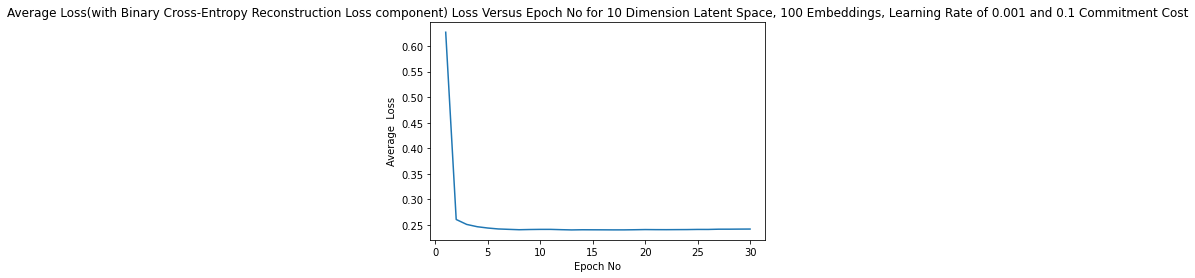

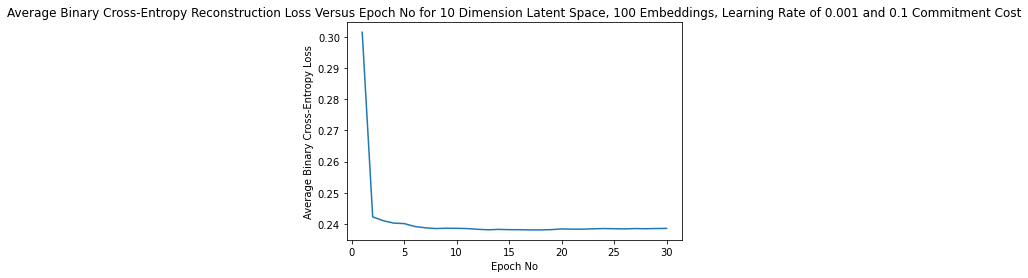

In [3]:
in1=VQVAE1(TRAINDATA,DATALOADER,10,100,0.001,0.1)

In [2]:
TRAINDATA,VALIDDATA,TESTDATA,DATALOADER=DataProcess()

In [3]:
import dill as pickle
with open('indices.pkl', 'rb') as file:
  indices=pickle.load(file)
#

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6997806429862976
tensor(1.0019, device='cuda:0', grad_fn=<DivBackward0>)
1.701709508895874
hello
0.66099613904953
tensor(0.9816, device='cuda:0', grad_fn=<DivBackward0>)
1.6426451206207275
hello
0.6345630884170532
tensor(0.9575, device='cuda:0', grad_fn=<DivBackward0>)
1.5920906066894531
hello
0.6113725900650024
tensor(0.9315, device='cuda:0', grad_fn=<DivBackward0>)
1.5428273677825928
hello
0.5866562724113464
tensor(0.9096, device='cuda:0', grad_fn=<DivBackward0>)
1.4962751865386963
hello
0.5585172772407532
tensor(0.8865, device='cuda:0', grad_fn=<DivBackward0>)
1.4450106620788574
hello
0.5258138179779053
tensor(0.8638, device='cuda:0', grad_fn=<DivBackward0>)
1.3896071910858154
hello
0.4887944459915161
tensor(0.8398, device='cuda:0', grad_fn=<DivBackward0>)
1.3285932540893555
hello
0.45278382301330566
tensor(0.8198, device='cuda:0', grad_fn=<DivBackward0>)
1.272559642791748
hello
0.41921862959861755
tensor(0.8018, device='cuda:0', grad_fn=<DivBackward0>)
1.220983624458313
hel

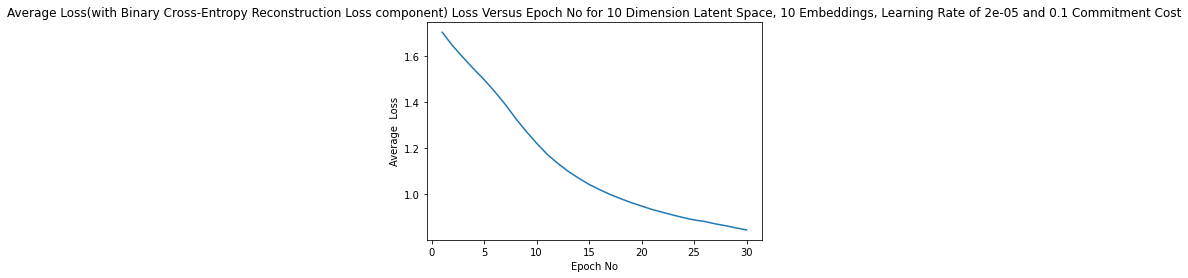

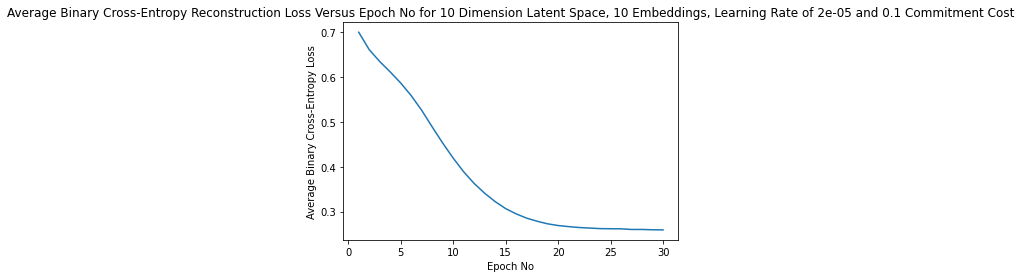

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6997806429862976
tensor(1.1841, device='cuda:0', grad_fn=<DivBackward0>)
1.8838796615600586
hello
0.66099613904953
tensor(1.1601, device='cuda:0', grad_fn=<DivBackward0>)
1.8211262226104736
hello
0.6345630884170532
tensor(1.1316, device='cuda:0', grad_fn=<DivBackward0>)
1.7661865949630737
hello
0.6113725900650024
tensor(1.1008, device='cuda:0', grad_fn=<DivBackward0>)
1.7121824026107788
hello
0.5866562724113464
tensor(1.0750, device='cuda:0', grad_fn=<DivBackward0>)
1.6616604328155518
hello
0.5585172772407532
tensor(1.0477, device='cuda:0', grad_fn=<DivBackward0>)
1.6061909198760986
hello
0.5258138179779053
tensor(1.0208, device='cuda:0', grad_fn=<DivBackward0>)
1.546660304069519
hello
0.4887944459915161
tensor(0.9925, device='cuda:0', grad_fn=<DivBackward0>)
1.4812839031219482
hello
0.45278382301330566
tensor(0.9688, device='cuda:0', grad_fn=<DivBackward0>)
1.4216094017028809
hello
0.41921862959861755
tensor(0.9475, device='cuda:0', grad_fn=<DivBackward0>)
1.3667584657669067
h

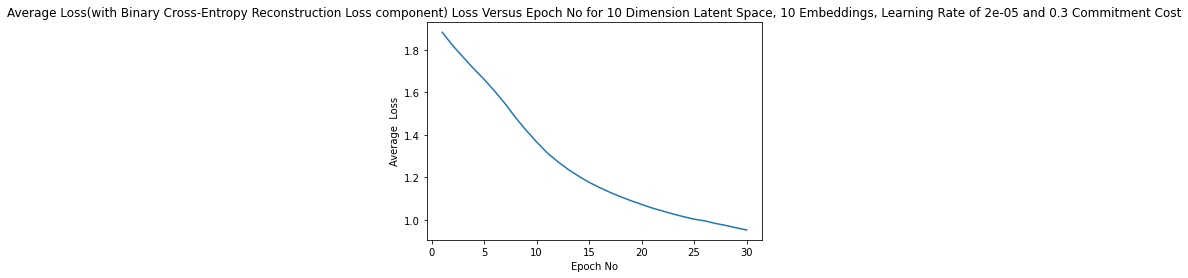

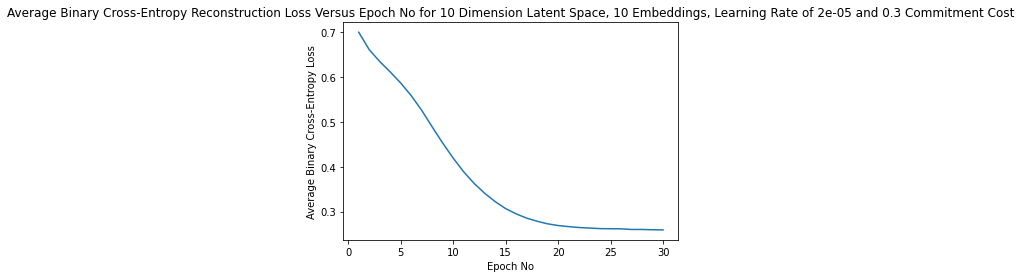

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6997806429862976
tensor(1.4574, device='cuda:0', grad_fn=<DivBackward0>)
2.157132148742676
hello
0.66099613904953
tensor(1.4279, device='cuda:0', grad_fn=<DivBackward0>)
2.0888493061065674
hello
0.6345630884170532
tensor(1.3928, device='cuda:0', grad_fn=<DivBackward0>)
2.0273289680480957
hello
0.6113725900650024
tensor(1.3548, device='cuda:0', grad_fn=<DivBackward0>)
1.96621572971344
hello
0.5866562724113464
tensor(1.3231, device='cuda:0', grad_fn=<DivBackward0>)
1.909738540649414
hello
0.5585172772407532
tensor(1.2894, device='cuda:0', grad_fn=<DivBackward0>)
1.847961664199829
hello
0.5258138179779053
tensor(1.2564, device='cuda:0', grad_fn=<DivBackward0>)
1.7822405099868774
hello
0.4887944459915161
tensor(1.2215, device='cuda:0', grad_fn=<DivBackward0>)
1.7103205919265747
hello
0.45278382301330566
tensor(1.1924, device='cuda:0', grad_fn=<DivBackward0>)
1.6451841592788696
hello
0.41921862959861755
tensor(1.1662, device='cuda:0', grad_fn=<DivBackward0>)
1.585423231124878
hello


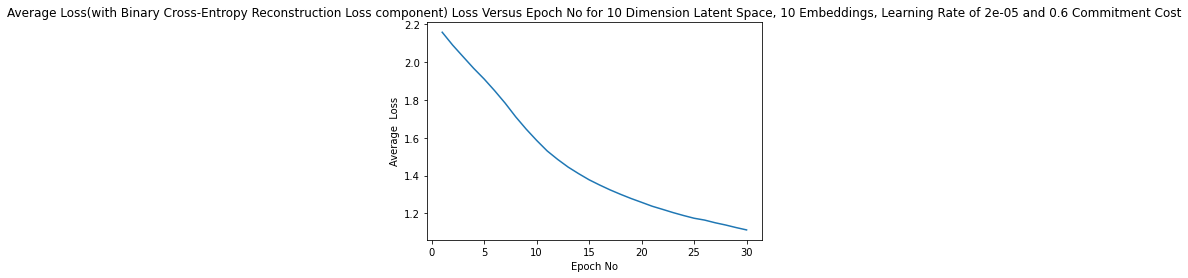

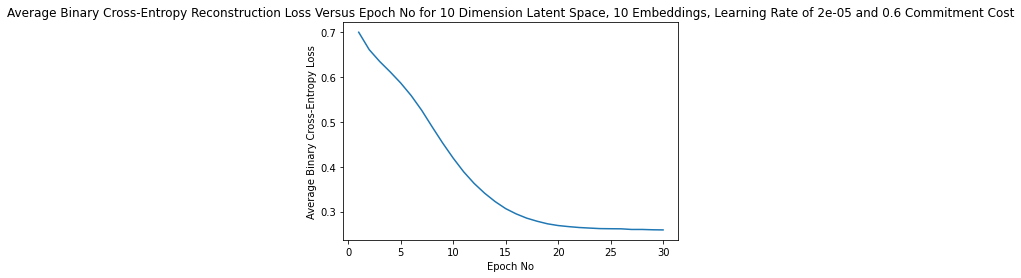

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6385716199874878
tensor(0.9561, device='cuda:0', grad_fn=<DivBackward0>)
1.5947177410125732
hello
0.48132288455963135
tensor(0.8504, device='cuda:0', grad_fn=<DivBackward0>)
1.3317227363586426
hello
0.3276253640651703
tensor(0.7587, device='cuda:0', grad_fn=<DivBackward0>)
1.0862902402877808
hello
0.2751898169517517
tensor(0.6767, device='cuda:0', grad_fn=<DivBackward0>)
0.9519379138946533
hello
0.2625332474708557
tensor(0.6063, device='cuda:0', grad_fn=<DivBackward0>)
0.8688181042671204
hello
0.25816935300827026
tensor(0.5515, device='cuda:0', grad_fn=<DivBackward0>)
0.8096538782119751
hello
0.25624749064445496
tensor(0.5069, device='cuda:0', grad_fn=<DivBackward0>)
0.7631701231002808
hello
0.2559241056442261
tensor(0.4686, device='cuda:0', grad_fn=<DivBackward0>)
0.7245639562606812
hello
0.25477132201194763
tensor(0.4397, device='cuda:0', grad_fn=<DivBackward0>)
0.6944504380226135
hello
0.2544749975204468
tensor(0.4105, device='cuda:0', grad_fn=<DivBackward0>)
0.6649979948997

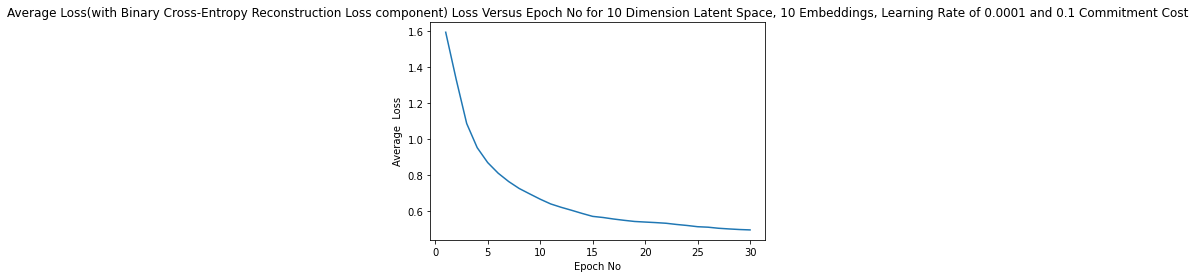

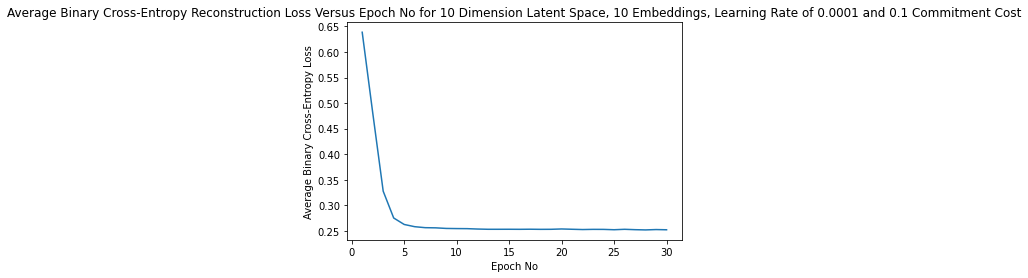

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6385716199874878
tensor(1.1300, device='cuda:0', grad_fn=<DivBackward0>)
1.7685627937316895
hello
0.48132288455963135
tensor(1.0050, device='cuda:0', grad_fn=<DivBackward0>)
1.4863415956497192
hello
0.3276253640651703
tensor(0.8966, device='cuda:0', grad_fn=<DivBackward0>)
1.2242287397384644
hello
0.2751898169517517
tensor(0.7998, device='cuda:0', grad_fn=<DivBackward0>)
1.0749843120574951
hello
0.2625332474708557
tensor(0.7165, device='cuda:0', grad_fn=<DivBackward0>)
0.979051947593689
hello
0.25816935300827026
tensor(0.6518, device='cuda:0', grad_fn=<DivBackward0>)
0.9099235534667969
hello
0.25624749064445496
tensor(0.5991, device='cuda:0', grad_fn=<DivBackward0>)
0.8553380966186523
hello
0.2559241056442261
tensor(0.5538, device='cuda:0', grad_fn=<DivBackward0>)
0.8097707629203796
hello
0.25477132201194763
tensor(0.5196, device='cuda:0', grad_fn=<DivBackward0>)
0.7743918895721436
hello
0.2544749975204468
tensor(0.4852, device='cuda:0', grad_fn=<DivBackward0>)
0.73963880538940

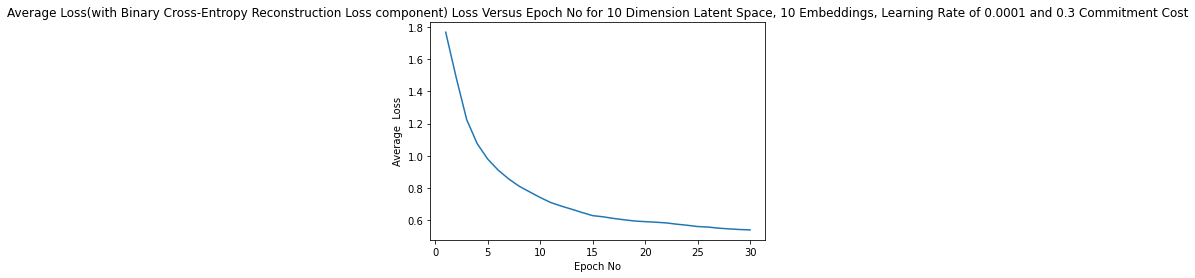

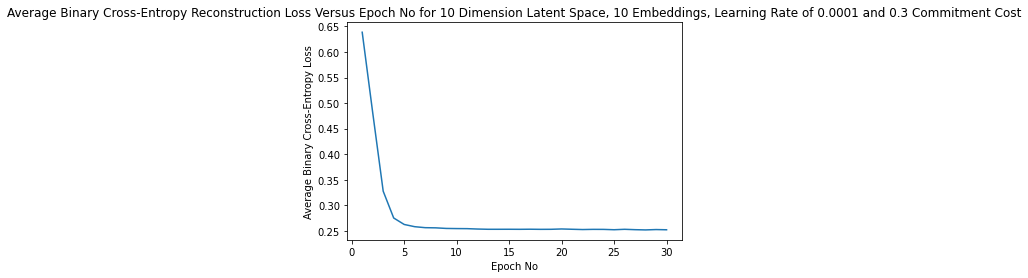

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6385716199874878
tensor(1.3908, device='cuda:0', grad_fn=<DivBackward0>)
2.029330253601074
hello
0.48132288455963135
tensor(1.2369, device='cuda:0', grad_fn=<DivBackward0>)
1.7182693481445312
hello
0.3276253640651703
tensor(1.1035, device='cuda:0', grad_fn=<DivBackward0>)
1.4311376810073853
hello
0.2751898169517517
tensor(0.9844, device='cuda:0', grad_fn=<DivBackward0>)
1.2595510482788086
hello
0.2625332474708557
tensor(0.8819, device='cuda:0', grad_fn=<DivBackward0>)
1.1444025039672852
hello
0.25816935300827026
tensor(0.8022, device='cuda:0', grad_fn=<DivBackward0>)
1.0603277683258057
hello
0.25624749064445496
tensor(0.7373, device='cuda:0', grad_fn=<DivBackward0>)
0.9935895204544067
hello
0.2559241056442261
tensor(0.6817, device='cuda:0', grad_fn=<DivBackward0>)
0.937581479549408
hello
0.25477132201194763
tensor(0.6395, device='cuda:0', grad_fn=<DivBackward0>)
0.8943041563034058
hello
0.2544749975204468
tensor(0.5971, device='cuda:0', grad_fn=<DivBackward0>)
0.851599633693695

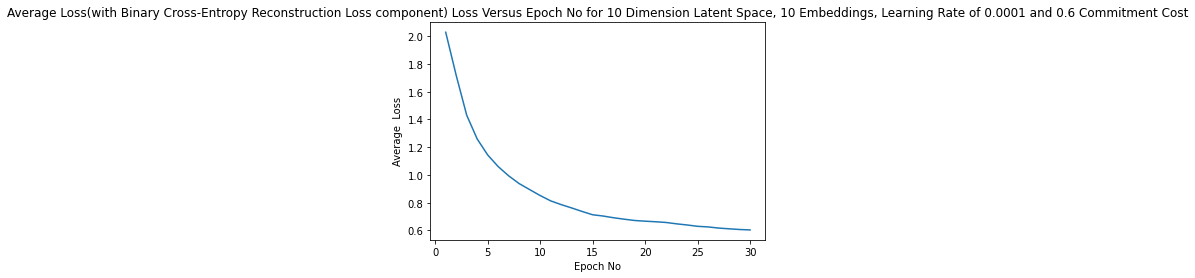

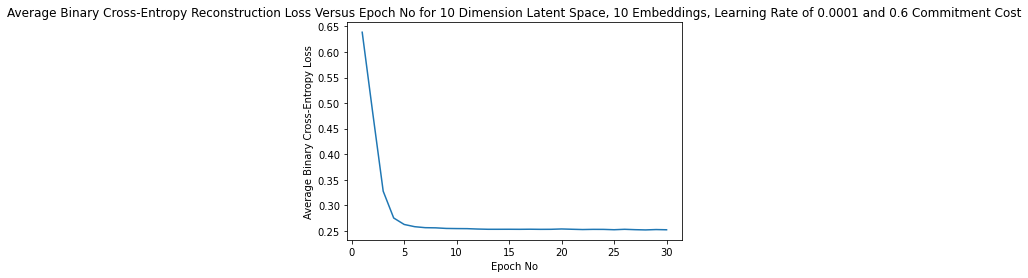

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3338782489299774
tensor(0.6940, device='cuda:0', grad_fn=<DivBackward0>)
1.027884840965271
hello
0.25705721974372864
tensor(0.4375, device='cuda:0', grad_fn=<DivBackward0>)
0.6945255994796753
hello
0.25704628229141235
tensor(0.4157, device='cuda:0', grad_fn=<DivBackward0>)
0.672744870185852
hello
0.2539772093296051
tensor(0.4287, device='cuda:0', grad_fn=<DivBackward0>)
0.682664155960083
hello
0.254724383354187
tensor(0.3951, device='cuda:0', grad_fn=<DivBackward0>)
0.6498607397079468
hello
0.25365400314331055
tensor(0.3684, device='cuda:0', grad_fn=<DivBackward0>)
0.6220721006393433
hello
0.25418341159820557
tensor(0.3898, device='cuda:0', grad_fn=<DivBackward0>)
0.644001841545105
hello
0.2533651888370514
tensor(0.3711, device='cuda:0', grad_fn=<DivBackward0>)
0.6244378089904785
hello
0.2520431876182556
tensor(0.3407, device='cuda:0', grad_fn=<DivBackward0>)
0.5927809476852417
hello
0.25387096405029297
tensor(0.3566, device='cuda:0', grad_fn=<DivBackward0>)
0.6104916334152222


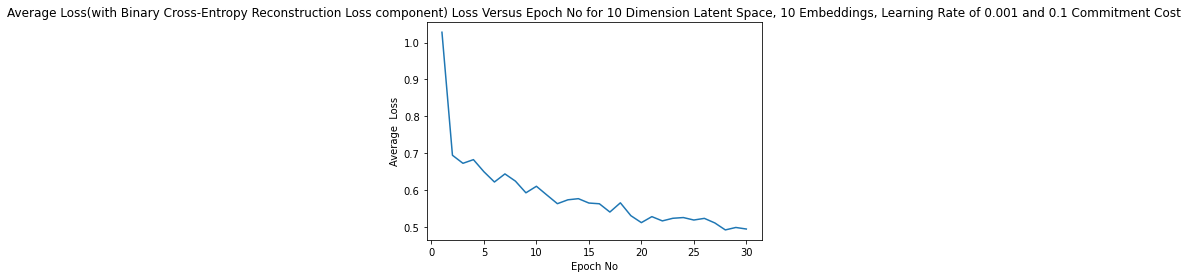

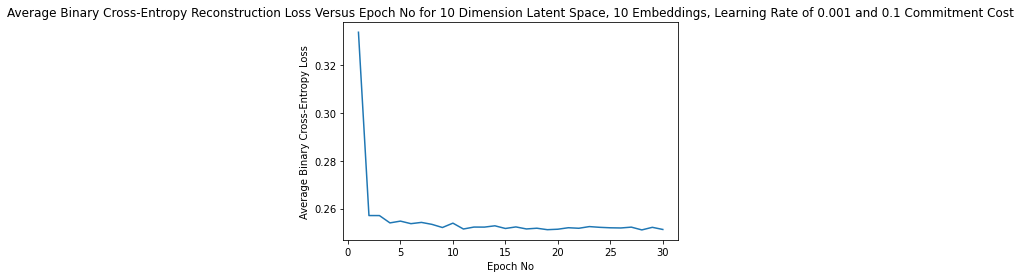

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3338782489299774
tensor(0.8202, device='cuda:0', grad_fn=<DivBackward0>)
1.1540673971176147
hello
0.25705721974372864
tensor(0.5170, device='cuda:0', grad_fn=<DivBackward0>)
0.7740651369094849
hello
0.25704628229141235
tensor(0.4913, device='cuda:0', grad_fn=<DivBackward0>)
0.7483264207839966
hello
0.2539772093296051
tensor(0.5066, device='cuda:0', grad_fn=<DivBackward0>)
0.7606074810028076
hello
0.254724383354187
tensor(0.4670, device='cuda:0', grad_fn=<DivBackward0>)
0.721703290939331
hello
0.25365400314331055
tensor(0.4354, device='cuda:0', grad_fn=<DivBackward0>)
0.6890579462051392
hello
0.25418341159820557
tensor(0.4607, device='cuda:0', grad_fn=<DivBackward0>)
0.7148778438568115
hello
0.2533651888370514
tensor(0.4385, device='cuda:0', grad_fn=<DivBackward0>)
0.6919056177139282
hello
0.2520431876182556
tensor(0.4027, device='cuda:0', grad_fn=<DivBackward0>)
0.6547328233718872
hello
0.25387096405029297
tensor(0.4215, device='cuda:0', grad_fn=<DivBackward0>)
0.67533165216445

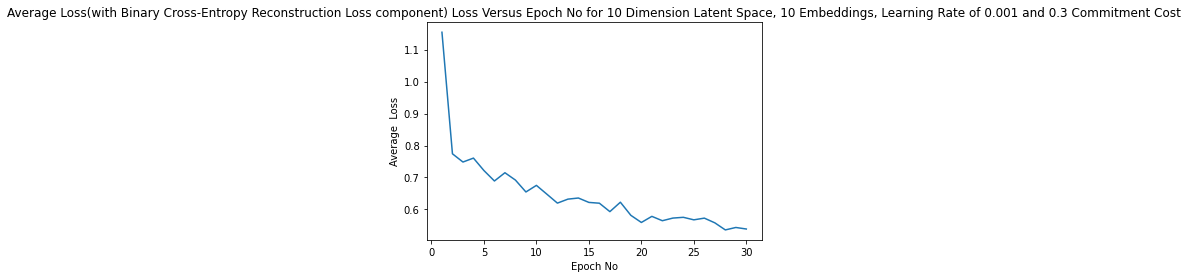

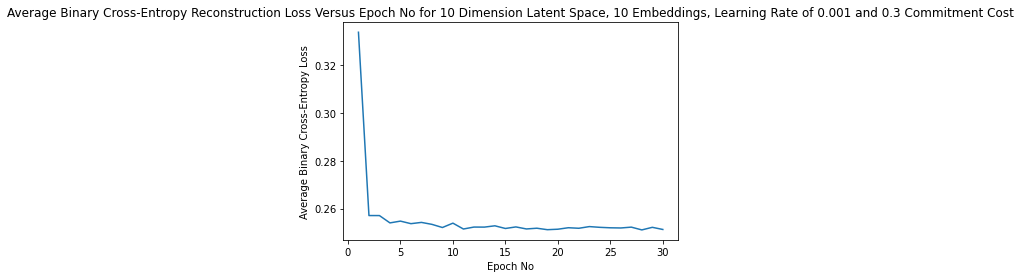

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3338782489299774
tensor(1.0095, device='cuda:0', grad_fn=<DivBackward0>)
1.3433419466018677
hello
0.25705721974372864
tensor(0.6363, device='cuda:0', grad_fn=<DivBackward0>)
0.8933748006820679
hello
0.25704628229141235
tensor(0.6047, device='cuda:0', grad_fn=<DivBackward0>)
0.8616982102394104
hello
0.2539772093296051
tensor(0.6235, device='cuda:0', grad_fn=<DivBackward0>)
0.8775218725204468
hello
0.254724383354187
tensor(0.5747, device='cuda:0', grad_fn=<DivBackward0>)
0.8294677138328552
hello
0.25365400314331055
tensor(0.5359, device='cuda:0', grad_fn=<DivBackward0>)
0.7895354628562927
hello
0.25418341159820557
tensor(0.5670, device='cuda:0', grad_fn=<DivBackward0>)
0.8211921453475952
hello
0.2533651888370514
tensor(0.5397, device='cuda:0', grad_fn=<DivBackward0>)
0.793107271194458
hello
0.2520431876182556
tensor(0.4956, device='cuda:0', grad_fn=<DivBackward0>)
0.7476617097854614
hello
0.25387096405029297
tensor(0.5187, device='cuda:0', grad_fn=<DivBackward0>)
0.77259176969528

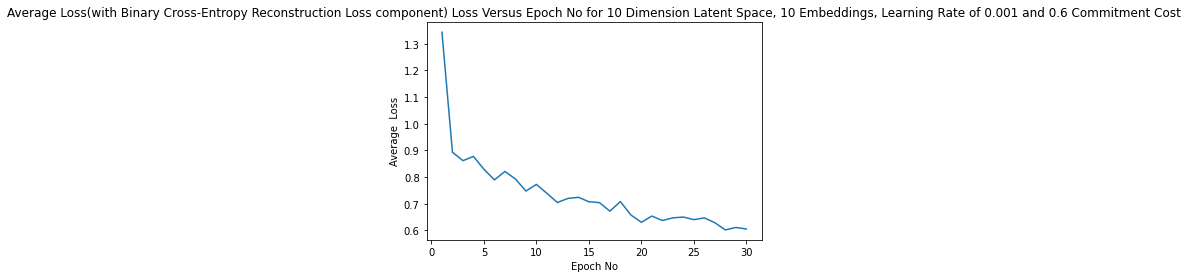

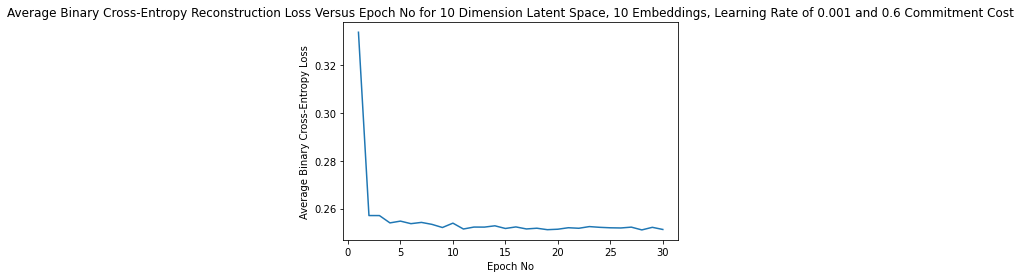

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.667997419834137
tensor(1.0783, device='cuda:0', grad_fn=<DivBackward0>)
1.7463233470916748
hello
0.6240920424461365
tensor(1.0723, device='cuda:0', grad_fn=<DivBackward0>)
1.6963632106781006
hello
0.587394654750824
tensor(1.0705, device='cuda:0', grad_fn=<DivBackward0>)
1.6579170227050781
hello
0.5502200126647949
tensor(1.0733, device='cuda:0', grad_fn=<DivBackward0>)
1.6235603094100952
hello
0.5119945406913757
tensor(1.0803, device='cuda:0', grad_fn=<DivBackward0>)
1.5922563076019287
hello
0.471804678440094
tensor(1.0823, device='cuda:0', grad_fn=<DivBackward0>)
1.5541484355926514
hello
0.43158212304115295
tensor(1.0803, device='cuda:0', grad_fn=<DivBackward0>)
1.511907935142517
hello
0.39366647601127625
tensor(1.0774, device='cuda:0', grad_fn=<DivBackward0>)
1.4710222482681274
hello
0.3605969250202179
tensor(1.0785, device='cuda:0', grad_fn=<DivBackward0>)
1.4391014575958252
hello
0.3330475986003876
tensor(1.0862, device='cuda:0', grad_fn=<DivBackward0>)
1.4192748069763184
he

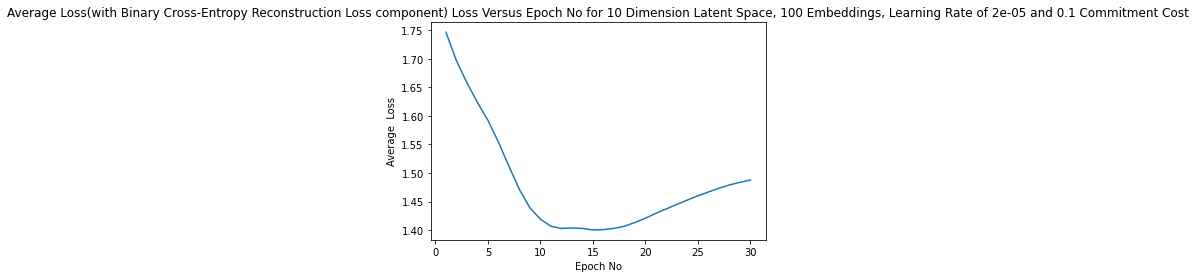

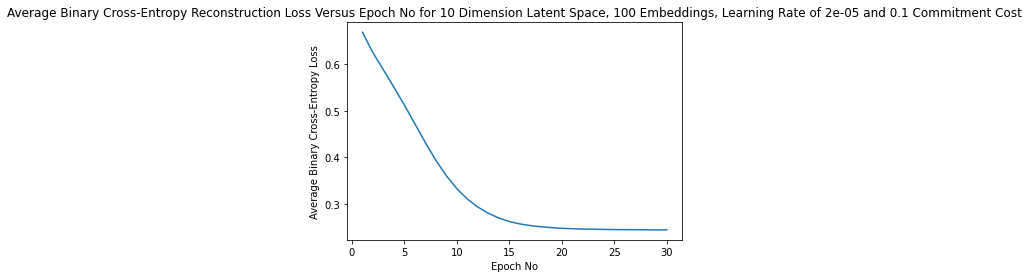

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.667997419834137
tensor(1.2744, device='cuda:0', grad_fn=<DivBackward0>)
1.9423813819885254
hello
0.6240920424461365
tensor(1.2672, device='cuda:0', grad_fn=<DivBackward0>)
1.8913207054138184
hello
0.587394654750824
tensor(1.2652, device='cuda:0', grad_fn=<DivBackward0>)
1.85255765914917
hello
0.5502200126647949
tensor(1.2685, device='cuda:0', grad_fn=<DivBackward0>)
1.8187130689620972
hello
0.5119945406913757
tensor(1.2767, device='cuda:0', grad_fn=<DivBackward0>)
1.7886683940887451
hello
0.471804678440094
tensor(1.2791, device='cuda:0', grad_fn=<DivBackward0>)
1.7509386539459229
hello
0.43158212304115295
tensor(1.2767, device='cuda:0', grad_fn=<DivBackward0>)
1.7083314657211304
hello
0.39366647601127625
tensor(1.2732, device='cuda:0', grad_fn=<DivBackward0>)
1.6669052839279175
hello
0.3605969250202179
tensor(1.2746, device='cuda:0', grad_fn=<DivBackward0>)
1.6351934671401978
hello
0.3330475986003876
tensor(1.2837, device='cuda:0', grad_fn=<DivBackward0>)
1.6167711019515991
hel

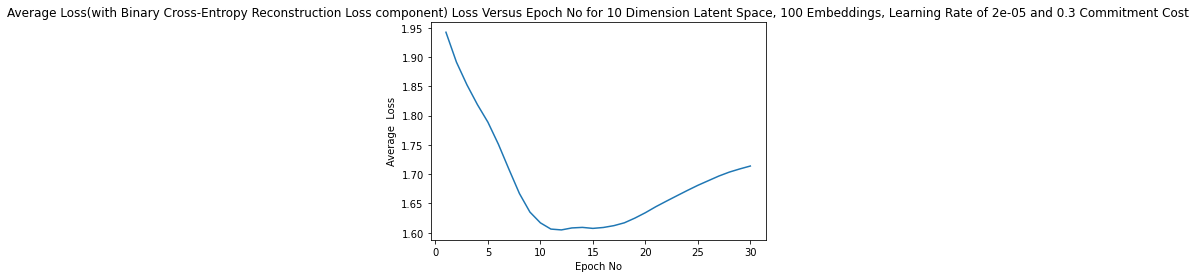

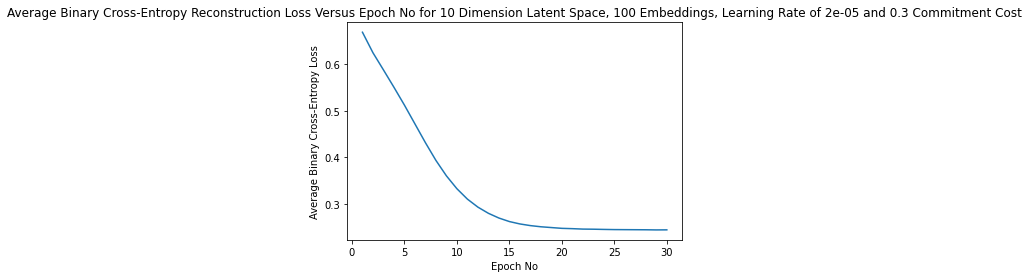

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.667997419834137
tensor(1.5685, device='cuda:0', grad_fn=<DivBackward0>)
2.2364697456359863
hello
0.6240920424461365
tensor(1.5597, device='cuda:0', grad_fn=<DivBackward0>)
2.183758020401001
hello
0.587394654750824
tensor(1.5571, device='cuda:0', grad_fn=<DivBackward0>)
2.1445186138153076
hello
0.5502200126647949
tensor(1.5612, device='cuda:0', grad_fn=<DivBackward0>)
2.111442804336548
hello
0.5119945406913757
tensor(1.5713, device='cuda:0', grad_fn=<DivBackward0>)
2.083284854888916
hello
0.471804678440094
tensor(1.5743, device='cuda:0', grad_fn=<DivBackward0>)
2.0461244583129883
hello
0.43158212304115295
tensor(1.5714, device='cuda:0', grad_fn=<DivBackward0>)
2.002964973449707
hello
0.39366647601127625
tensor(1.5671, device='cuda:0', grad_fn=<DivBackward0>)
1.9607301950454712
hello
0.3605969250202179
tensor(1.5687, device='cuda:0', grad_fn=<DivBackward0>)
1.9293314218521118
hello
0.3330475986003876
tensor(1.5800, device='cuda:0', grad_fn=<DivBackward0>)
1.9130144119262695
hello

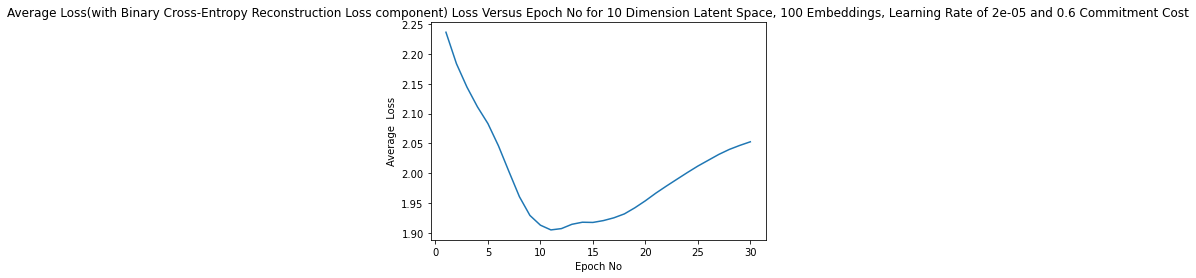

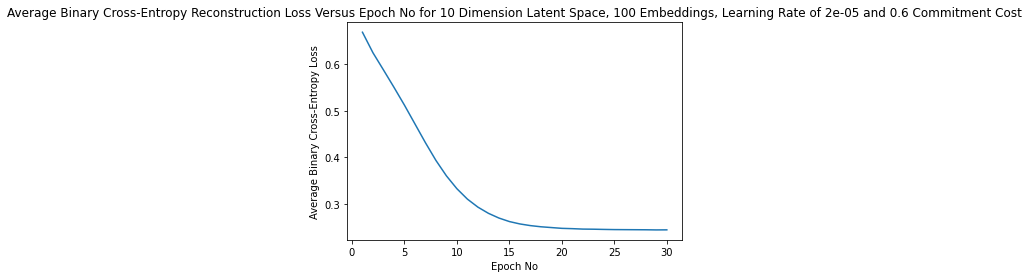

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5845202207565308
tensor(1.0757, device='cuda:0', grad_fn=<DivBackward0>)
1.6602263450622559
hello
0.38394543528556824
tensor(1.0896, device='cuda:0', grad_fn=<DivBackward0>)
1.473568081855774
hello
0.2830011546611786
tensor(1.0929, device='cuda:0', grad_fn=<DivBackward0>)
1.375942349433899
hello
0.25711485743522644
tensor(1.0868, device='cuda:0', grad_fn=<DivBackward0>)
1.3439562320709229
hello
0.2501140832901001
tensor(1.0854, device='cuda:0', grad_fn=<DivBackward0>)
1.3355358839035034
hello
0.24696573615074158
tensor(1.0860, device='cuda:0', grad_fn=<DivBackward0>)
1.332963228225708
hello
0.24563531577587128
tensor(1.0861, device='cuda:0', grad_fn=<DivBackward0>)
1.3317699432373047
hello
0.24490942060947418
tensor(1.0929, device='cuda:0', grad_fn=<DivBackward0>)
1.337786078453064
hello
0.244420126080513
tensor(1.0981, device='cuda:0', grad_fn=<DivBackward0>)
1.3425475358963013
hello
0.24437494575977325
tensor(1.1062, device='cuda:0', grad_fn=<DivBackward0>)
1.3505750894546509

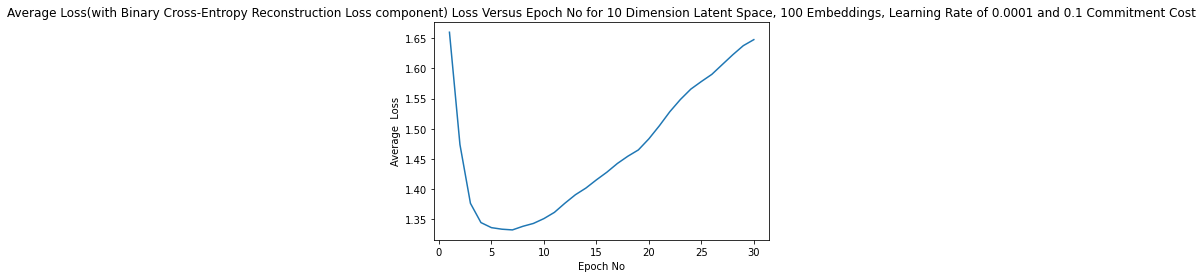

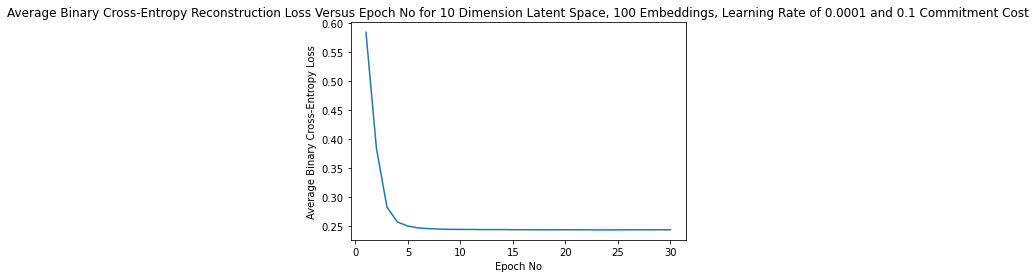

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5845202207565308
tensor(1.2713, device='cuda:0', grad_fn=<DivBackward0>)
1.8558098077774048
hello
0.38394543528556824
tensor(1.2877, device='cuda:0', grad_fn=<DivBackward0>)
1.6716809272766113
hello
0.2830011546611786
tensor(1.2917, device='cuda:0', grad_fn=<DivBackward0>)
1.574659824371338
hello
0.25711485743522644
tensor(1.2844, device='cuda:0', grad_fn=<DivBackward0>)
1.5415637493133545
hello
0.2501140832901001
tensor(1.2828, device='cuda:0', grad_fn=<DivBackward0>)
1.5328850746154785
hello
0.24696573615074158
tensor(1.2835, device='cuda:0', grad_fn=<DivBackward0>)
1.5304181575775146
hello
0.24563531577587128
tensor(1.2836, device='cuda:0', grad_fn=<DivBackward0>)
1.5292484760284424
hello
0.24490942060947418
tensor(1.2916, device='cuda:0', grad_fn=<DivBackward0>)
1.5364912748336792
hello
0.244420126080513
tensor(1.2978, device='cuda:0', grad_fn=<DivBackward0>)
1.5422085523605347
hello
0.24437494575977325
tensor(1.3073, device='cuda:0', grad_fn=<DivBackward0>)
1.5517027378082

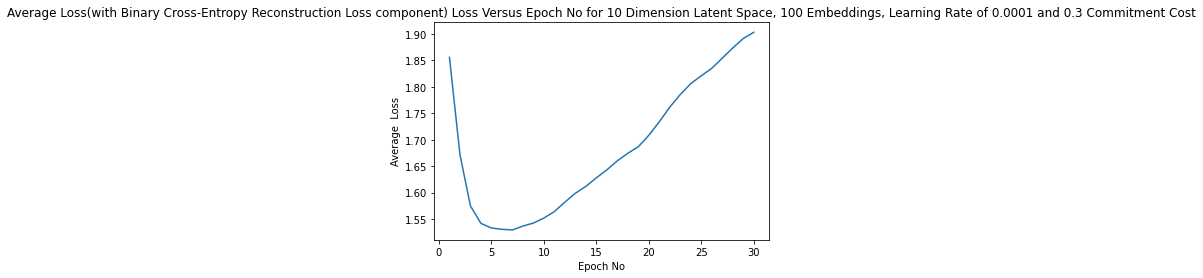

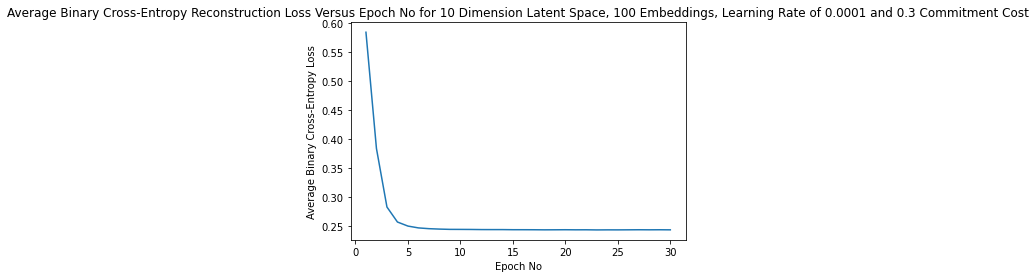

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5845202207565308
tensor(1.5647, device='cuda:0', grad_fn=<DivBackward0>)
2.149183511734009
hello
0.38394543528556824
tensor(1.5849, device='cuda:0', grad_fn=<DivBackward0>)
1.9688514471054077
hello
0.2830011546611786
tensor(1.5897, device='cuda:0', grad_fn=<DivBackward0>)
1.8727349042892456
hello
0.25711485743522644
tensor(1.5809, device='cuda:0', grad_fn=<DivBackward0>)
1.8379765748977661
hello
0.2501140832901001
tensor(1.5788, device='cuda:0', grad_fn=<DivBackward0>)
1.8289105892181396
hello
0.24696573615074158
tensor(1.5796, device='cuda:0', grad_fn=<DivBackward0>)
1.8265981674194336
hello
0.24563531577587128
tensor(1.5798, device='cuda:0', grad_fn=<DivBackward0>)
1.8254669904708862
hello
0.24490942060947418
tensor(1.5896, device='cuda:0', grad_fn=<DivBackward0>)
1.8345476388931274
hello
0.244420126080513
tensor(1.5973, device='cuda:0', grad_fn=<DivBackward0>)
1.8416979312896729
hello
0.24437494575977325
tensor(1.6090, device='cuda:0', grad_fn=<DivBackward0>)
1.8533922433853

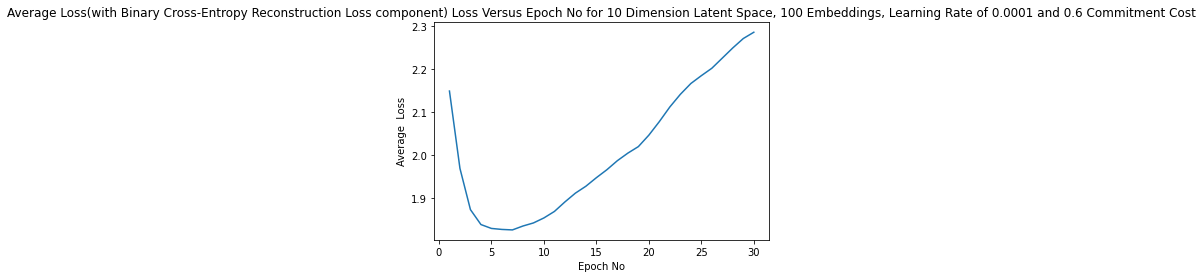

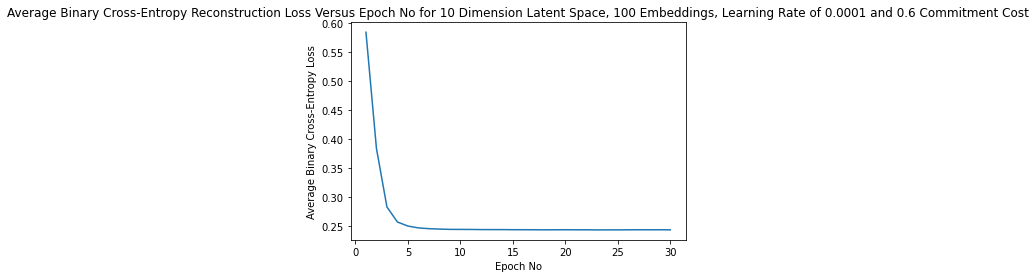

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.30878543853759766
tensor(1.2559, device='cuda:0', grad_fn=<DivBackward0>)
1.5646902322769165
hello
0.24643467366695404
tensor(1.5932, device='cuda:0', grad_fn=<DivBackward0>)
1.8396320343017578
hello
0.2450408935546875
tensor(1.8037, device='cuda:0', grad_fn=<DivBackward0>)
2.0486927032470703
hello
0.2443658858537674
tensor(1.7575, device='cuda:0', grad_fn=<DivBackward0>)
2.0018489360809326
hello
0.24354188144207
tensor(1.7112, device='cuda:0', grad_fn=<DivBackward0>)
1.9547160863876343
hello
0.24402670562267303
tensor(1.6454, device='cuda:0', grad_fn=<DivBackward0>)
1.8894177675247192
hello
0.24309341609477997
tensor(1.6210, device='cuda:0', grad_fn=<DivBackward0>)
1.8640739917755127
hello
0.24344290792942047
tensor(1.5713, device='cuda:0', grad_fn=<DivBackward0>)
1.814743995666504
hello
0.24286001920700073
tensor(1.6273, device='cuda:0', grad_fn=<DivBackward0>)
1.8701512813568115
hello
0.24258345365524292
tensor(1.6557, device='cuda:0', grad_fn=<DivBackward0>)
1.8982706069946

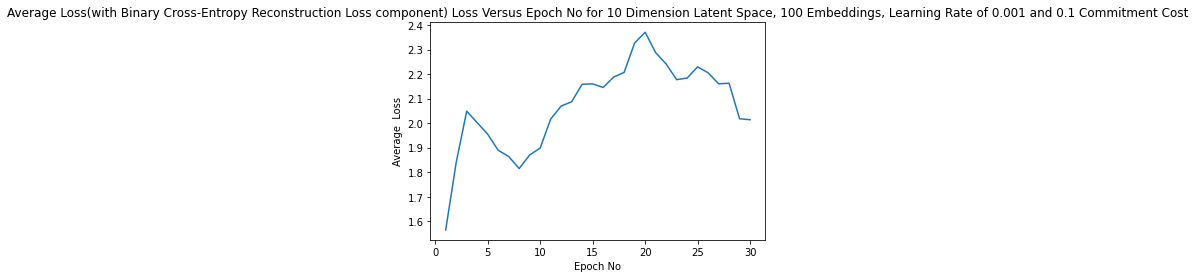

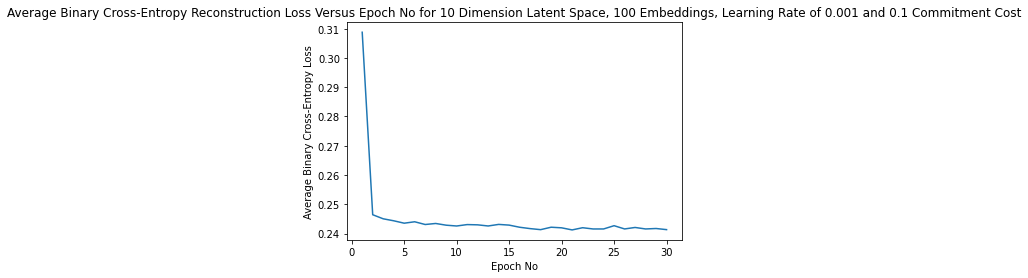

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.30878543853759766
tensor(1.4843, device='cuda:0', grad_fn=<DivBackward0>)
1.7930355072021484
hello
0.24643467366695404
tensor(1.8829, device='cuda:0', grad_fn=<DivBackward0>)
2.1293046474456787
hello
0.2450408935546875
tensor(2.1316, device='cuda:0', grad_fn=<DivBackward0>)
2.376629114151001
hello
0.2443658858537674
tensor(2.0770, device='cuda:0', grad_fn=<DivBackward0>)
2.321392297744751
hello
0.24354188144207
tensor(2.0223, device='cuda:0', grad_fn=<DivBackward0>)
2.265838146209717
hello
0.24402670562267303
tensor(1.9446, device='cuda:0', grad_fn=<DivBackward0>)
2.1885807514190674
hello
0.24309341609477997
tensor(1.9157, device='cuda:0', grad_fn=<DivBackward0>)
2.158797264099121
hello
0.24344290792942047
tensor(1.8570, device='cuda:0', grad_fn=<DivBackward0>)
2.1004371643066406
hello
0.24286001920700073
tensor(1.9232, device='cuda:0', grad_fn=<DivBackward0>)
2.1660220623016357
hello
0.24258345365524292
tensor(1.9567, device='cuda:0', grad_fn=<DivBackward0>)
2.1993041038513184

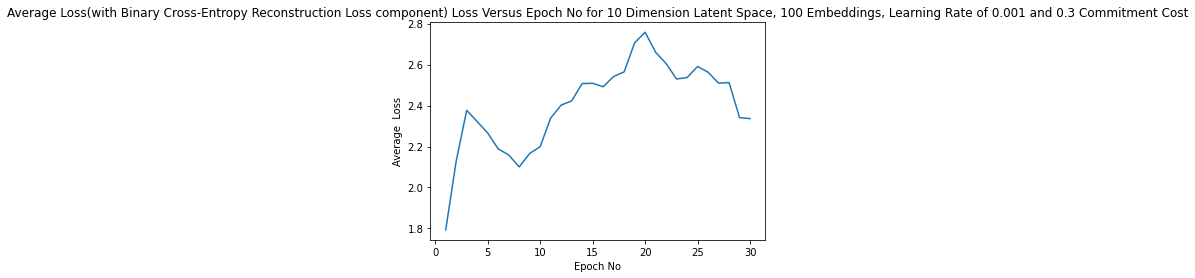

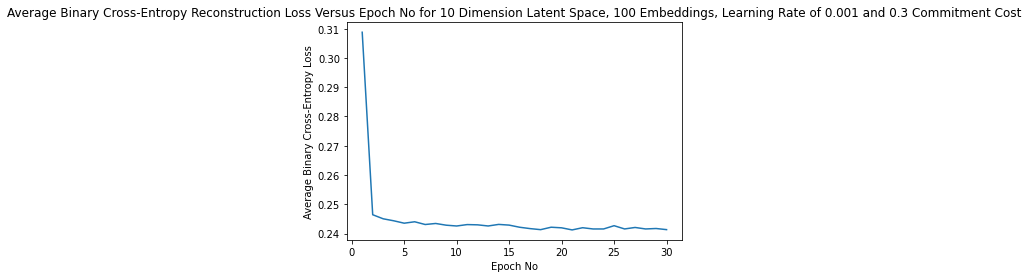

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.30878543853759766
tensor(1.8268, device='cuda:0', grad_fn=<DivBackward0>)
2.1355557441711426
hello
0.24643467366695404
tensor(2.3174, device='cuda:0', grad_fn=<DivBackward0>)
2.563815116882324
hello
0.2450408935546875
tensor(2.6235, device='cuda:0', grad_fn=<DivBackward0>)
2.8685338497161865
hello
0.2443658858537674
tensor(2.5563, device='cuda:0', grad_fn=<DivBackward0>)
2.800705671310425
hello
0.24354188144207
tensor(2.4890, device='cuda:0', grad_fn=<DivBackward0>)
2.7325215339660645
hello
0.24402670562267303
tensor(2.3933, device='cuda:0', grad_fn=<DivBackward0>)
2.6373229026794434
hello
0.24309341609477997
tensor(2.3578, device='cuda:0', grad_fn=<DivBackward0>)
2.6008803844451904
hello
0.24344290792942047
tensor(2.2855, device='cuda:0', grad_fn=<DivBackward0>)
2.5289723873138428
hello
0.24286001920700073
tensor(2.3670, device='cuda:0', grad_fn=<DivBackward0>)
2.609828472137451
hello
0.24258345365524292
tensor(2.4083, device='cuda:0', grad_fn=<DivBackward0>)
2.650855302810669

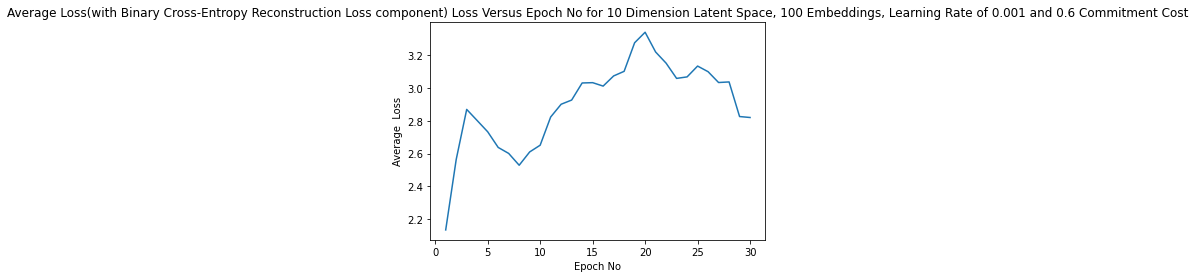

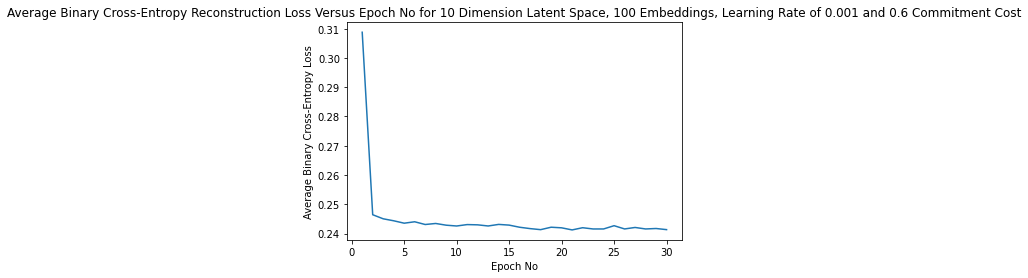

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6638855934143066
tensor(1.0343, device='cuda:0', grad_fn=<DivBackward0>)
1.6981992721557617
hello
0.6202391982078552
tensor(1.0082, device='cuda:0', grad_fn=<DivBackward0>)
1.6284687519073486
hello
0.5963369011878967
tensor(0.9916, device='cuda:0', grad_fn=<DivBackward0>)
1.5879278182983398
hello
0.5757779479026794
tensor(0.9750, device='cuda:0', grad_fn=<DivBackward0>)
1.5507640838623047
hello
0.5528660416603088
tensor(0.9587, device='cuda:0', grad_fn=<DivBackward0>)
1.5116039514541626
hello
0.5229966640472412
tensor(0.9438, device='cuda:0', grad_fn=<DivBackward0>)
1.4667832851409912
hello
0.48918038606643677
tensor(0.9279, device='cuda:0', grad_fn=<DivBackward0>)
1.4170347452163696
hello
0.45395591855049133
tensor(0.9145, device='cuda:0', grad_fn=<DivBackward0>)
1.3684284687042236
hello
0.4192049205303192
tensor(0.9010, device='cuda:0', grad_fn=<DivBackward0>)
1.3202030658721924
hello
0.3881494700908661
tensor(0.8897, device='cuda:0', grad_fn=<DivBackward0>)
1.277862310409546

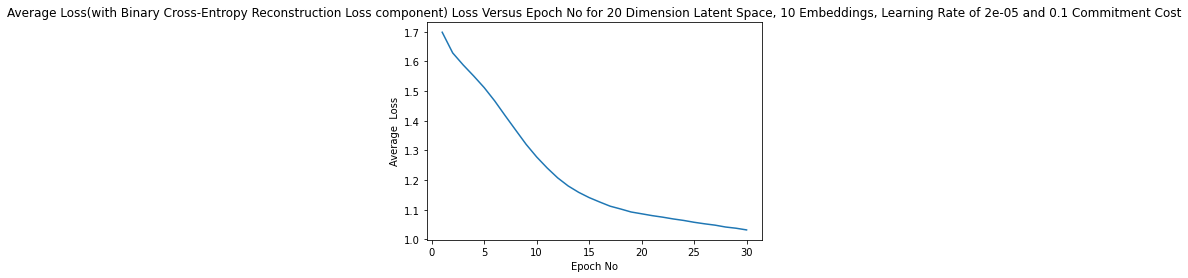

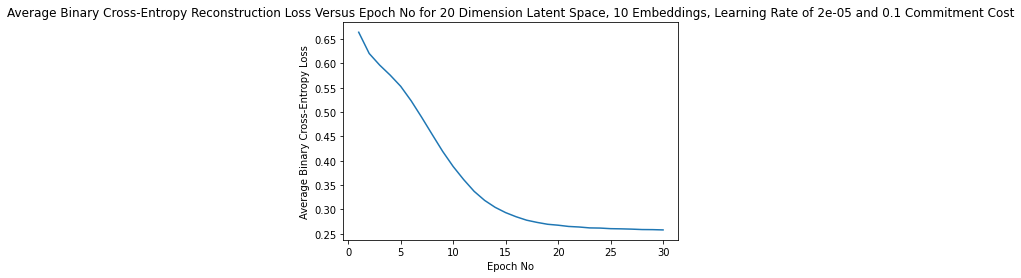

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6638855934143066
tensor(1.2224, device='cuda:0', grad_fn=<DivBackward0>)
1.8862555027008057
hello
0.6202391982078552
tensor(1.1915, device='cuda:0', grad_fn=<DivBackward0>)
1.8117828369140625
hello
0.5963369011878967
tensor(1.1719, device='cuda:0', grad_fn=<DivBackward0>)
1.768216848373413
hello
0.5757779479026794
tensor(1.1523, device='cuda:0', grad_fn=<DivBackward0>)
1.7280330657958984
hello
0.5528660416603088
tensor(1.1331, device='cuda:0', grad_fn=<DivBackward0>)
1.685920000076294
hello
0.5229966640472412
tensor(1.1154, device='cuda:0', grad_fn=<DivBackward0>)
1.6383801698684692
hello
0.48918038606643677
tensor(1.0966, device='cuda:0', grad_fn=<DivBackward0>)
1.5857348442077637
hello
0.45395591855049133
tensor(1.0807, device='cuda:0', grad_fn=<DivBackward0>)
1.5346972942352295
hello
0.4192049205303192
tensor(1.0648, device='cuda:0', grad_fn=<DivBackward0>)
1.4840208292007446
hello
0.3881494700908661
tensor(1.0515, device='cuda:0', grad_fn=<DivBackward0>)
1.439629316329956
h

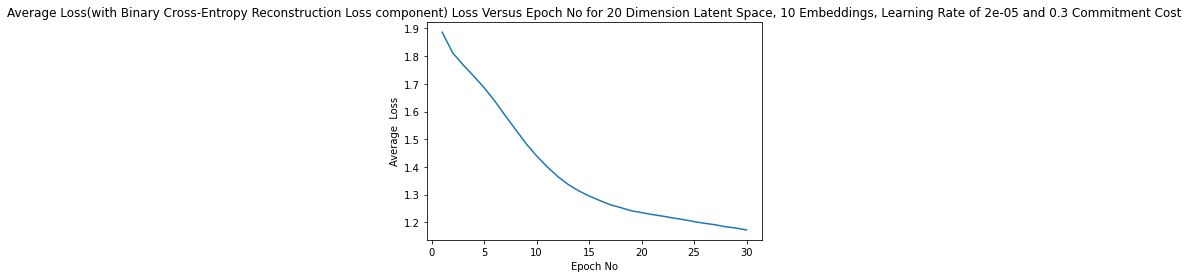

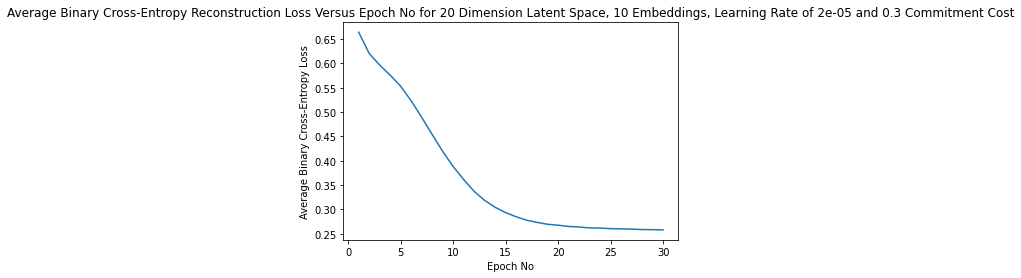

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6638855934143066
tensor(1.5045, device='cuda:0', grad_fn=<DivBackward0>)
2.168341636657715
hello
0.6202391982078552
tensor(1.4665, device='cuda:0', grad_fn=<DivBackward0>)
2.086754560470581
hello
0.5963369011878967
tensor(1.4423, device='cuda:0', grad_fn=<DivBackward0>)
2.038649559020996
hello
0.5757779479026794
tensor(1.4182, device='cuda:0', grad_fn=<DivBackward0>)
1.993938684463501
hello
0.5528660416603088
tensor(1.3945, device='cuda:0', grad_fn=<DivBackward0>)
1.9473938941955566
hello
0.5229966640472412
tensor(1.3728, device='cuda:0', grad_fn=<DivBackward0>)
1.8957782983779907
hello
0.48918038606643677
tensor(1.3496, device='cuda:0', grad_fn=<DivBackward0>)
1.8387856483459473
hello
0.45395591855049133
tensor(1.3301, device='cuda:0', grad_fn=<DivBackward0>)
1.7840992212295532
hello
0.4192049205303192
tensor(1.3105, device='cuda:0', grad_fn=<DivBackward0>)
1.7297474145889282
hello
0.3881494700908661
tensor(1.2941, device='cuda:0', grad_fn=<DivBackward0>)
1.682278037071228
hel

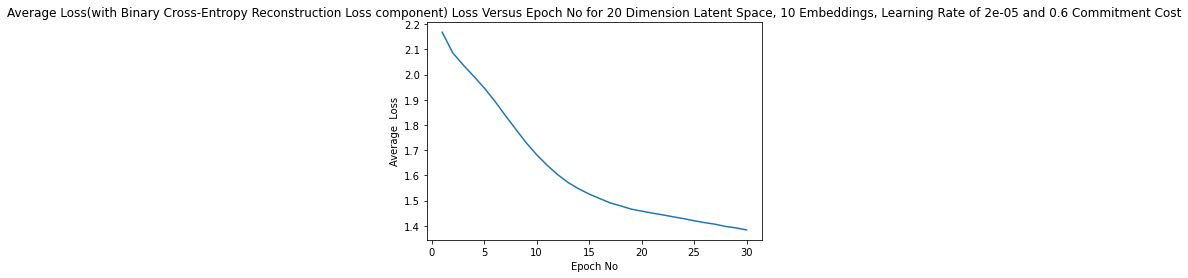

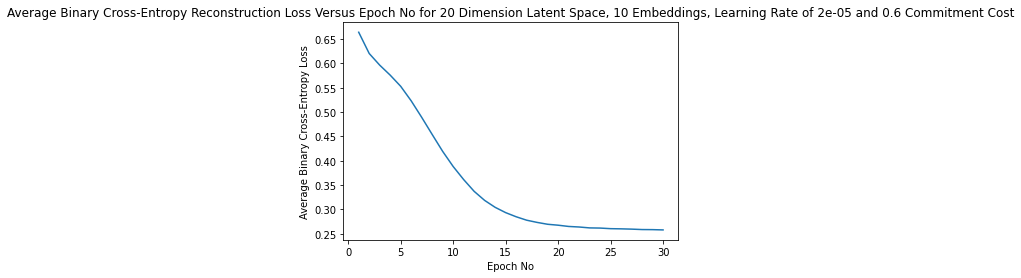

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6034154891967773
tensor(0.9942, device='cuda:0', grad_fn=<DivBackward0>)
1.5975756645202637
hello
0.4504252076148987
tensor(0.9130, device='cuda:0', grad_fn=<DivBackward0>)
1.363447904586792
hello
0.320169597864151
tensor(0.8591, device='cuda:0', grad_fn=<DivBackward0>)
1.1793168783187866
hello
0.27649715542793274
tensor(0.8218, device='cuda:0', grad_fn=<DivBackward0>)
1.0982507467269897
hello
0.26425600051879883
tensor(0.7909, device='cuda:0', grad_fn=<DivBackward0>)
1.0552046298980713
hello
0.2595188319683075
tensor(0.7626, device='cuda:0', grad_fn=<DivBackward0>)
1.0221425294876099
hello
0.25782784819602966
tensor(0.7345, device='cuda:0', grad_fn=<DivBackward0>)
0.9922840595245361
hello
0.25687509775161743
tensor(0.7210, device='cuda:0', grad_fn=<DivBackward0>)
0.9778862595558167
hello
0.2560745179653168
tensor(0.7046, device='cuda:0', grad_fn=<DivBackward0>)
0.9606318473815918
hello
0.2552700638771057
tensor(0.6973, device='cuda:0', grad_fn=<DivBackward0>)
0.952544569969177

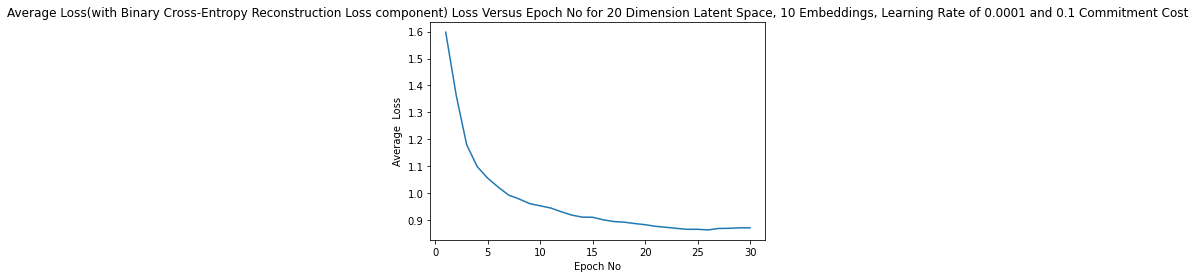

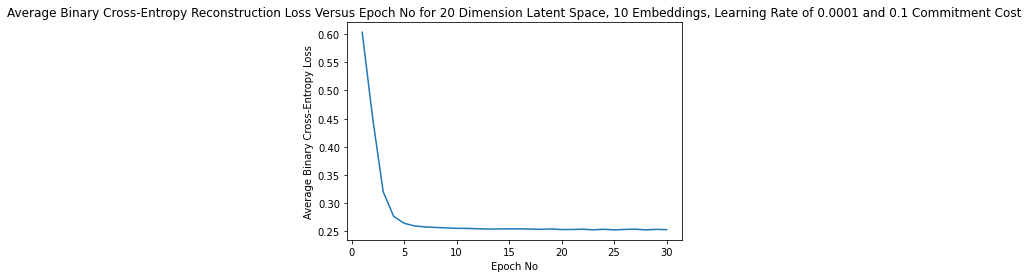

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6034154891967773
tensor(1.1749, device='cuda:0', grad_fn=<DivBackward0>)
1.7783316373825073
hello
0.4504252076148987
tensor(1.0790, device='cuda:0', grad_fn=<DivBackward0>)
1.529451847076416
hello
0.320169597864151
tensor(1.0154, device='cuda:0', grad_fn=<DivBackward0>)
1.335524559020996
hello
0.27649715542793274
tensor(0.9712, device='cuda:0', grad_fn=<DivBackward0>)
1.2476601600646973
hello
0.26425600051879883
tensor(0.9348, device='cuda:0', grad_fn=<DivBackward0>)
1.1990132331848145
hello
0.2595188319683075
tensor(0.9013, device='cuda:0', grad_fn=<DivBackward0>)
1.1608011722564697
hello
0.25782784819602966
tensor(0.8680, device='cuda:0', grad_fn=<DivBackward0>)
1.1258214712142944
hello
0.25687509775161743
tensor(0.8521, device='cuda:0', grad_fn=<DivBackward0>)
1.108978271484375
hello
0.2560745179653168
tensor(0.8327, device='cuda:0', grad_fn=<DivBackward0>)
1.0887335538864136
hello
0.2552700638771057
tensor(0.8241, device='cuda:0', grad_fn=<DivBackward0>)
1.0793217420578003


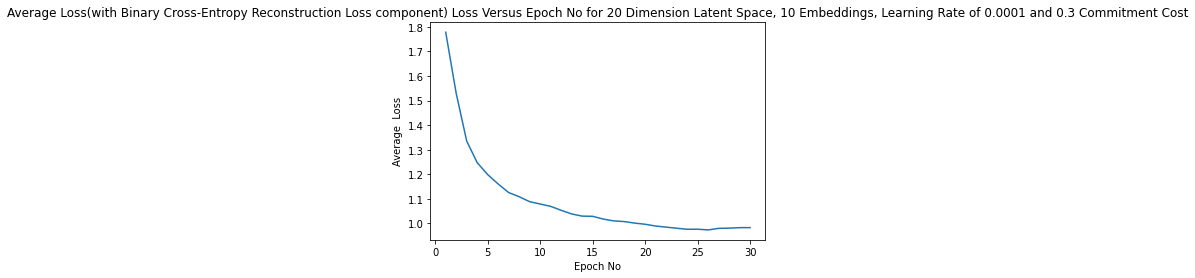

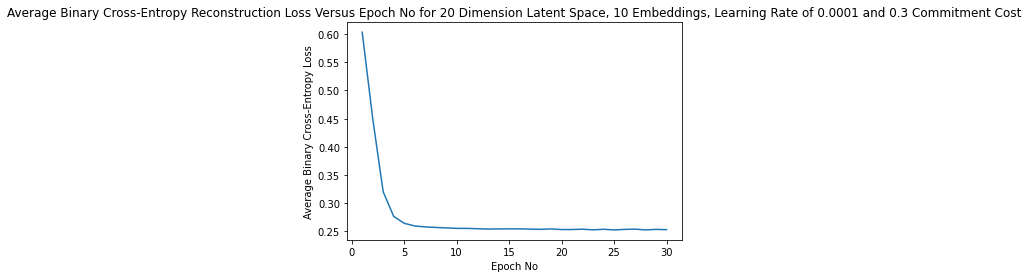

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6034154891967773
tensor(1.4461, device='cuda:0', grad_fn=<DivBackward0>)
2.0494656562805176
hello
0.4504252076148987
tensor(1.3280, device='cuda:0', grad_fn=<DivBackward0>)
1.7784581184387207
hello
0.320169597864151
tensor(1.2497, device='cuda:0', grad_fn=<DivBackward0>)
1.5698381662368774
hello
0.27649715542793274
tensor(1.1953, device='cuda:0', grad_fn=<DivBackward0>)
1.4717751741409302
hello
0.26425600051879883
tensor(1.1505, device='cuda:0', grad_fn=<DivBackward0>)
1.4147272109985352
hello
0.2595188319683075
tensor(1.1093, device='cuda:0', grad_fn=<DivBackward0>)
1.368789792060852
hello
0.25782784819602966
tensor(1.0683, device='cuda:0', grad_fn=<DivBackward0>)
1.3261274099349976
hello
0.25687509775161743
tensor(1.0487, device='cuda:0', grad_fn=<DivBackward0>)
1.305619478225708
hello
0.2560745179653168
tensor(1.0248, device='cuda:0', grad_fn=<DivBackward0>)
1.280885934829712
hello
0.2552700638771057
tensor(1.0142, device='cuda:0', grad_fn=<DivBackward0>)
1.2694873809814453


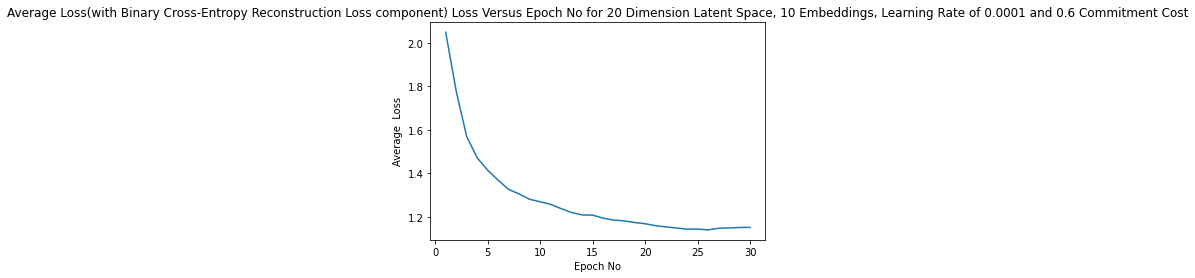

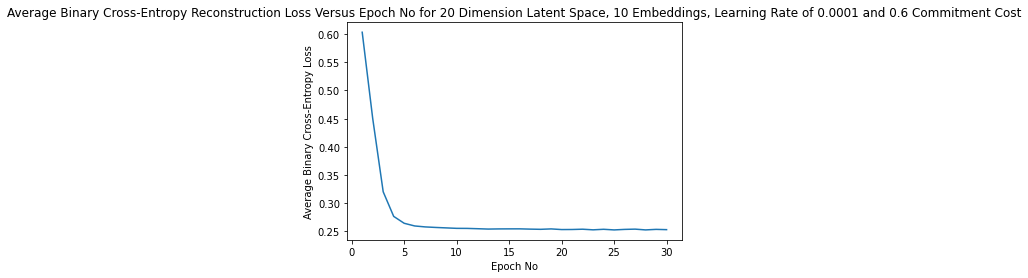

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3304009437561035
tensor(0.8581, device='cuda:0', grad_fn=<DivBackward0>)
1.1884698867797852
hello
0.25757119059562683
tensor(0.8361, device='cuda:0', grad_fn=<DivBackward0>)
1.0937023162841797
hello
0.25649189949035645
tensor(0.8472, device='cuda:0', grad_fn=<DivBackward0>)
1.103691577911377
hello
0.2563697099685669
tensor(0.8110, device='cuda:0', grad_fn=<DivBackward0>)
1.0673654079437256
hello
0.2546422481536865
tensor(0.7923, device='cuda:0', grad_fn=<DivBackward0>)
1.0469160079956055
hello
0.25592127442359924
tensor(0.7948, device='cuda:0', grad_fn=<DivBackward0>)
1.0506755113601685
hello
0.25378113985061646
tensor(0.7708, device='cuda:0', grad_fn=<DivBackward0>)
1.0246000289916992
hello
0.2549436688423157
tensor(0.7682, device='cuda:0', grad_fn=<DivBackward0>)
1.0231537818908691
hello
0.25478214025497437
tensor(0.7854, device='cuda:0', grad_fn=<DivBackward0>)
1.0401711463928223
hello
0.25415393710136414
tensor(0.7544, device='cuda:0', grad_fn=<DivBackward0>)
1.008599638938

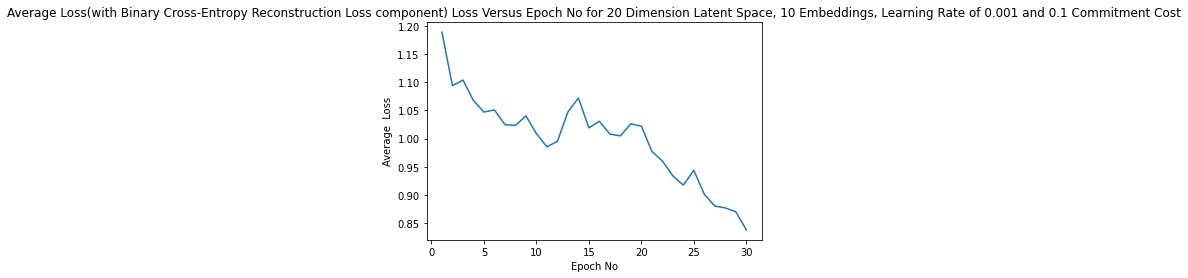

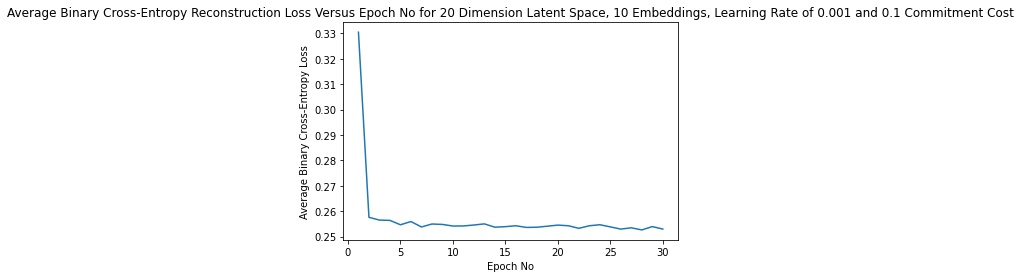

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3304009437561035
tensor(1.0141, device='cuda:0', grad_fn=<DivBackward0>)
1.344482183456421
hello
0.25757119059562683
tensor(0.9882, device='cuda:0', grad_fn=<DivBackward0>)
1.245726466178894
hello
0.25649189949035645
tensor(1.0012, device='cuda:0', grad_fn=<DivBackward0>)
1.2577271461486816
hello
0.2563697099685669
tensor(0.9584, device='cuda:0', grad_fn=<DivBackward0>)
1.2148184776306152
hello
0.2546422481536865
tensor(0.9363, device='cuda:0', grad_fn=<DivBackward0>)
1.1909658908843994
hello
0.25592127442359924
tensor(0.9393, device='cuda:0', grad_fn=<DivBackward0>)
1.1951773166656494
hello
0.25378113985061646
tensor(0.9110, device='cuda:0', grad_fn=<DivBackward0>)
1.1647491455078125
hello
0.2549436688423157
tensor(0.9079, device='cuda:0', grad_fn=<DivBackward0>)
1.162827730178833
hello
0.25478214025497437
tensor(0.9282, device='cuda:0', grad_fn=<DivBackward0>)
1.1829702854156494
hello
0.25415393710136414
tensor(0.8916, device='cuda:0', grad_fn=<DivBackward0>)
1.14577150344848

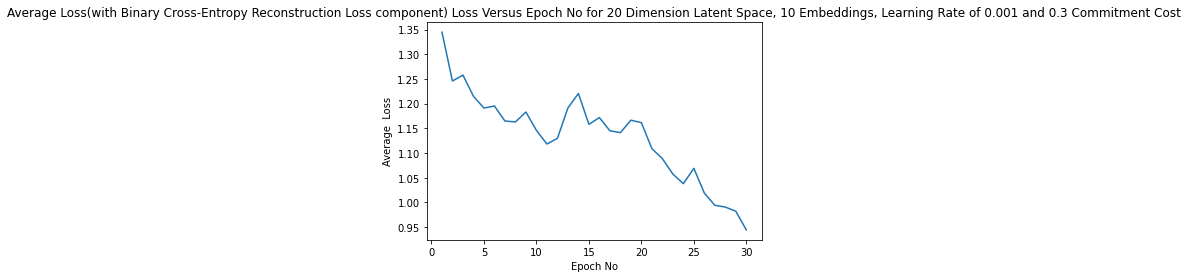

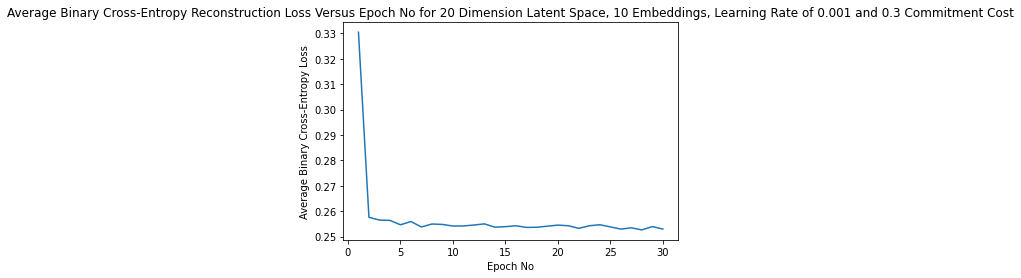

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3304009437561035
tensor(1.2481, device='cuda:0', grad_fn=<DivBackward0>)
1.5785017013549805
hello
0.25757119059562683
tensor(1.2162, device='cuda:0', grad_fn=<DivBackward0>)
1.4737614393234253
hello
0.25649189949035645
tensor(1.2323, device='cuda:0', grad_fn=<DivBackward0>)
1.4887820482254028
hello
0.2563697099685669
tensor(1.1796, device='cuda:0', grad_fn=<DivBackward0>)
1.4360003471374512
hello
0.2546422481536865
tensor(1.1524, device='cuda:0', grad_fn=<DivBackward0>)
1.4070404767990112
hello
0.25592127442359924
tensor(1.1560, device='cuda:0', grad_fn=<DivBackward0>)
1.4119287729263306
hello
0.25378113985061646
tensor(1.1212, device='cuda:0', grad_fn=<DivBackward0>)
1.374971628189087
hello
0.2549436688423157
tensor(1.1174, device='cuda:0', grad_fn=<DivBackward0>)
1.372340440750122
hello
0.25478214025497437
tensor(1.1424, device='cuda:0', grad_fn=<DivBackward0>)
1.3971669673919678
hello
0.25415393710136414
tensor(1.0974, device='cuda:0', grad_fn=<DivBackward0>)
1.3515298366546

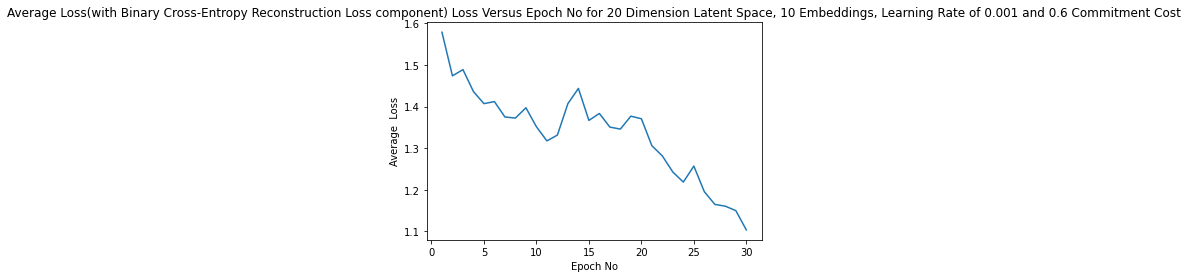

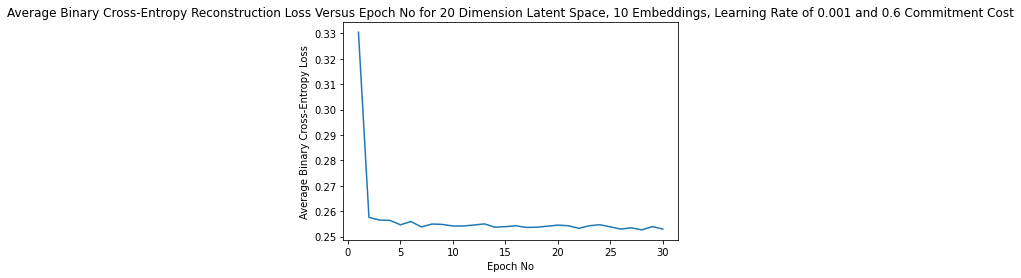

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6383634209632874
tensor(1.0876, device='cuda:0', grad_fn=<DivBackward0>)
1.7259738445281982
hello
0.5907508134841919
tensor(1.0940, device='cuda:0', grad_fn=<DivBackward0>)
1.6847338676452637
hello
0.5561318397521973
tensor(1.1097, device='cuda:0', grad_fn=<DivBackward0>)
1.6658393144607544
hello
0.5157498121261597
tensor(1.1317, device='cuda:0', grad_fn=<DivBackward0>)
1.647454023361206
hello
0.46862515807151794
tensor(1.1542, device='cuda:0', grad_fn=<DivBackward0>)
1.6228140592575073
hello
0.4180653989315033
tensor(1.1789, device='cuda:0', grad_fn=<DivBackward0>)
1.596976637840271
hello
0.3726600408554077
tensor(1.2028, device='cuda:0', grad_fn=<DivBackward0>)
1.575449824333191
hello
0.3354717791080475
tensor(1.2202, device='cuda:0', grad_fn=<DivBackward0>)
1.5556399822235107
hello
0.30714571475982666
tensor(1.2350, device='cuda:0', grad_fn=<DivBackward0>)
1.5421245098114014
hello
0.28681883215904236
tensor(1.2486, device='cuda:0', grad_fn=<DivBackward0>)
1.5354112386703491


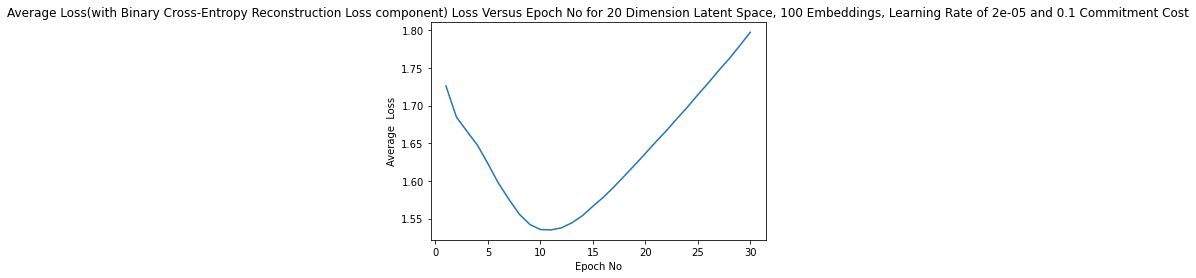

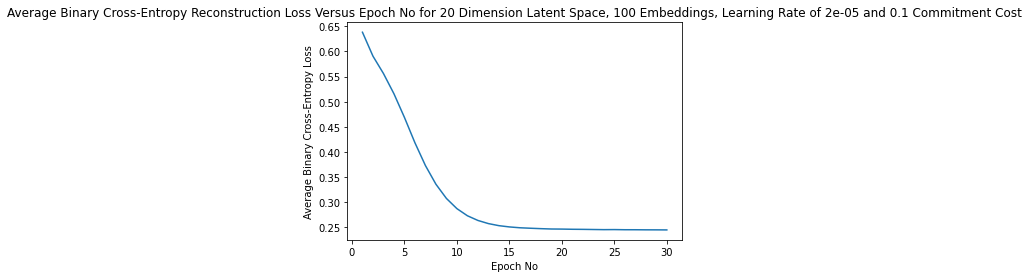

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6383634209632874
tensor(1.2854, device='cuda:0', grad_fn=<DivBackward0>)
1.9237205982208252
hello
0.5907508134841919
tensor(1.2929, device='cuda:0', grad_fn=<DivBackward0>)
1.8836400508880615
hello
0.5561318397521973
tensor(1.3115, device='cuda:0', grad_fn=<DivBackward0>)
1.8676042556762695
hello
0.5157498121261597
tensor(1.3375, device='cuda:0', grad_fn=<DivBackward0>)
1.853217601776123
hello
0.46862515807151794
tensor(1.3640, device='cuda:0', grad_fn=<DivBackward0>)
1.8326677083969116
hello
0.4180653989315033
tensor(1.3933, device='cuda:0', grad_fn=<DivBackward0>)
1.8113254308700562
hello
0.3726600408554077
tensor(1.4215, device='cuda:0', grad_fn=<DivBackward0>)
1.7941384315490723
hello
0.3354717791080475
tensor(1.4420, device='cuda:0', grad_fn=<DivBackward0>)
1.7774877548217773
hello
0.30714571475982666
tensor(1.4595, device='cuda:0', grad_fn=<DivBackward0>)
1.766666054725647
hello
0.28681883215904236
tensor(1.4756, device='cuda:0', grad_fn=<DivBackward0>)
1.7624287605285645

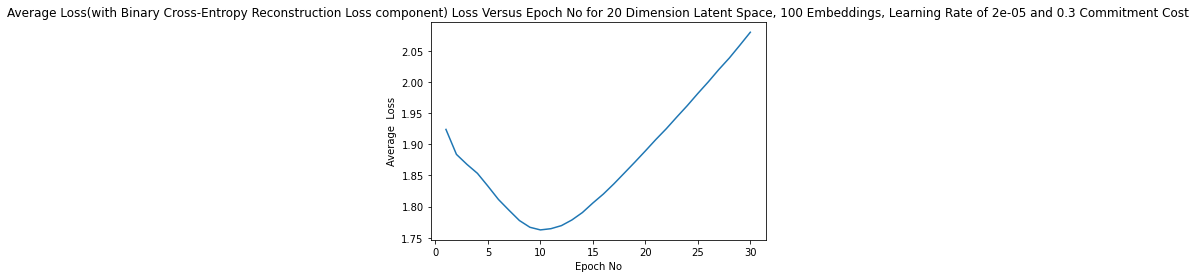

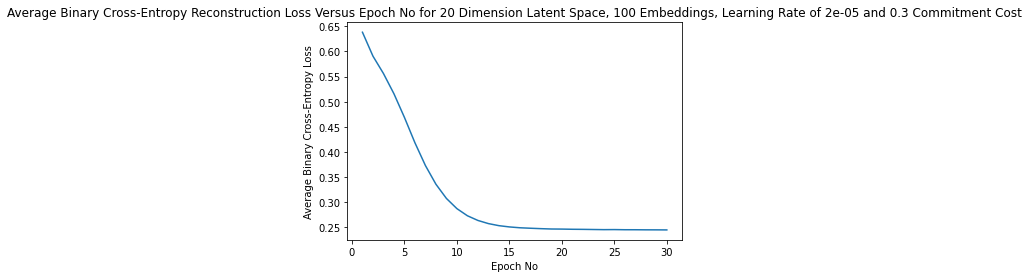

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6383634209632874
tensor(1.5820, device='cuda:0', grad_fn=<DivBackward0>)
2.220341444015503
hello
0.5907508134841919
tensor(1.5912, device='cuda:0', grad_fn=<DivBackward0>)
2.1819984912872314
hello
0.5561318397521973
tensor(1.6141, device='cuda:0', grad_fn=<DivBackward0>)
2.170253038406372
hello
0.5157498121261597
tensor(1.6461, device='cuda:0', grad_fn=<DivBackward0>)
2.161863327026367
hello
0.46862515807151794
tensor(1.6788, device='cuda:0', grad_fn=<DivBackward0>)
2.147444725036621
hello
0.4180653989315033
tensor(1.7148, device='cuda:0', grad_fn=<DivBackward0>)
2.1328468322753906
hello
0.3726600408554077
tensor(1.7495, device='cuda:0', grad_fn=<DivBackward0>)
2.1221723556518555
hello
0.3354717791080475
tensor(1.7748, device='cuda:0', grad_fn=<DivBackward0>)
2.110261917114258
hello
0.30714571475982666
tensor(1.7963, device='cuda:0', grad_fn=<DivBackward0>)
2.1034774780273438
hello
0.28681883215904236
tensor(1.8161, device='cuda:0', grad_fn=<DivBackward0>)
2.102954149246216
hel

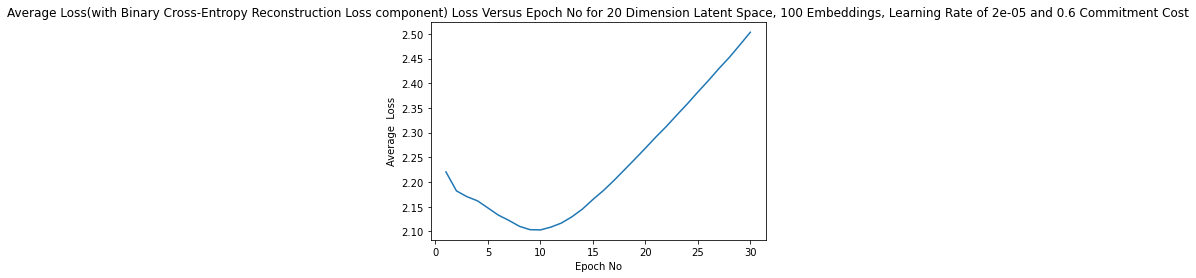

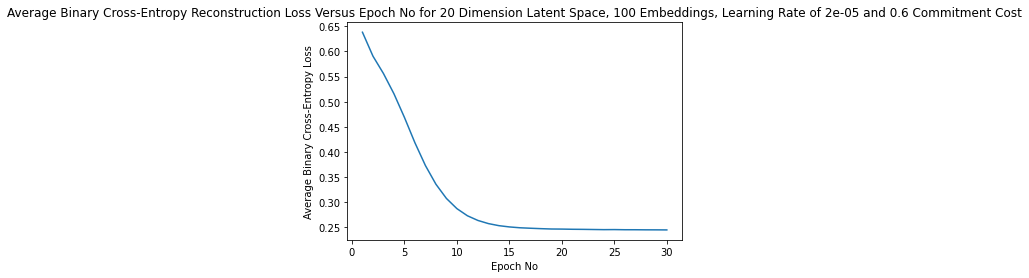

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5527299642562866
tensor(1.1123, device='cuda:0', grad_fn=<DivBackward0>)
1.6650630235671997
hello
0.3386743366718292
tensor(1.2149, device='cuda:0', grad_fn=<DivBackward0>)
1.5535987615585327
hello
0.2616725564002991
tensor(1.3011, device='cuda:0', grad_fn=<DivBackward0>)
1.5628087520599365
hello
0.2495850771665573
tensor(1.3776, device='cuda:0', grad_fn=<DivBackward0>)
1.627184271812439
hello
0.24646706879138947
tensor(1.4470, device='cuda:0', grad_fn=<DivBackward0>)
1.693438172340393
hello
0.24519847333431244
tensor(1.5209, device='cuda:0', grad_fn=<DivBackward0>)
1.766066074371338
hello
0.24445804953575134
tensor(1.5862, device='cuda:0', grad_fn=<DivBackward0>)
1.8307071924209595
hello
0.2438620775938034
tensor(1.6551, device='cuda:0', grad_fn=<DivBackward0>)
1.898966908454895
hello
0.24338363111019135
tensor(1.7170, device='cuda:0', grad_fn=<DivBackward0>)
1.9603955745697021
hello
0.24308186769485474
tensor(1.7869, device='cuda:0', grad_fn=<DivBackward0>)
2.02996826171875
h

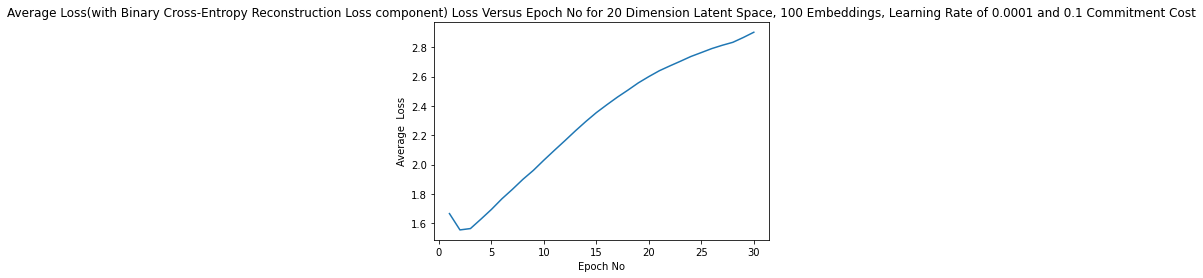

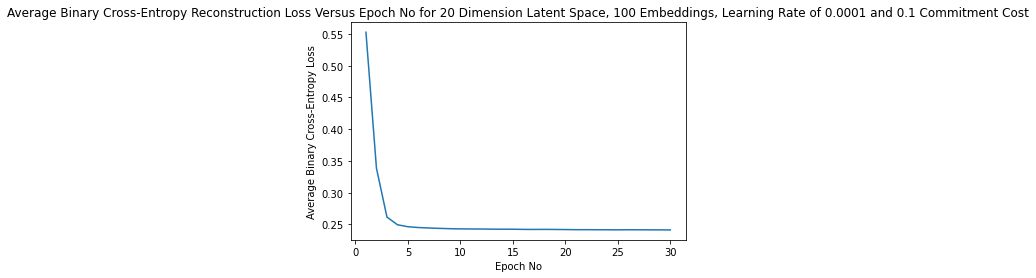

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5527299642562866
tensor(1.3146, device='cuda:0', grad_fn=<DivBackward0>)
1.8673051595687866
hello
0.3386743366718292
tensor(1.4358, device='cuda:0', grad_fn=<DivBackward0>)
1.774493932723999
hello
0.2616725564002991
tensor(1.5377, device='cuda:0', grad_fn=<DivBackward0>)
1.7993788719177246
hello
0.2495850771665573
tensor(1.6281, device='cuda:0', grad_fn=<DivBackward0>)
1.8776557445526123
hello
0.24646706879138947
tensor(1.7101, device='cuda:0', grad_fn=<DivBackward0>)
1.9565231800079346
hello
0.24519847333431244
tensor(1.7974, device='cuda:0', grad_fn=<DivBackward0>)
2.0425870418548584
hello
0.24445804953575134
tensor(1.8747, device='cuda:0', grad_fn=<DivBackward0>)
2.119115114212036
hello
0.2438620775938034
tensor(1.9560, device='cuda:0', grad_fn=<DivBackward0>)
2.1998960971832275
hello
0.24338363111019135
tensor(2.0292, device='cuda:0', grad_fn=<DivBackward0>)
2.2725796699523926
hello
0.24308186769485474
tensor(2.1118, device='cuda:0', grad_fn=<DivBackward0>)
2.35485672950744

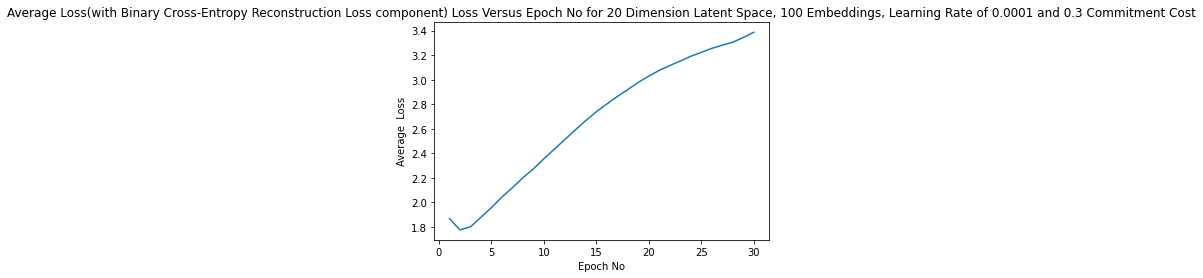

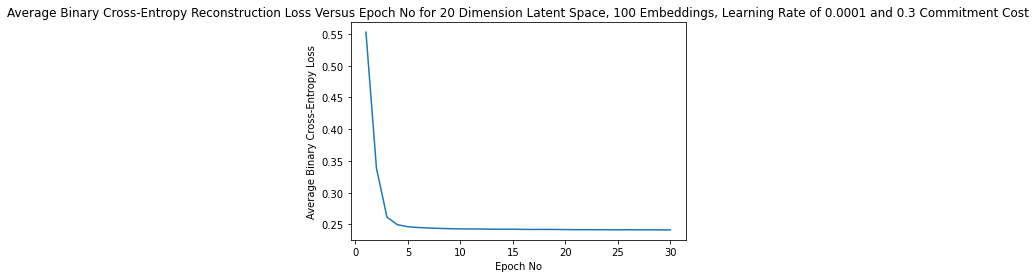

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5527299642562866
tensor(1.6179, device='cuda:0', grad_fn=<DivBackward0>)
2.170668601989746
hello
0.3386743366718292
tensor(1.7672, device='cuda:0', grad_fn=<DivBackward0>)
2.105837106704712
hello
0.2616725564002991
tensor(1.8926, device='cuda:0', grad_fn=<DivBackward0>)
2.1542346477508545
hello
0.2495850771665573
tensor(2.0038, device='cuda:0', grad_fn=<DivBackward0>)
2.253366470336914
hello
0.24646706879138947
tensor(2.1047, device='cuda:0', grad_fn=<DivBackward0>)
2.3511500358581543
hello
0.24519847333431244
tensor(2.2122, device='cuda:0', grad_fn=<DivBackward0>)
2.457368850708008
hello
0.24445804953575134
tensor(2.3073, device='cuda:0', grad_fn=<DivBackward0>)
2.551729440689087
hello
0.2438620775938034
tensor(2.4074, device='cuda:0', grad_fn=<DivBackward0>)
2.65128755569458
hello
0.24338363111019135
tensor(2.4975, device='cuda:0', grad_fn=<DivBackward0>)
2.740853786468506
hello
0.24308186769485474
tensor(2.5991, device='cuda:0', grad_fn=<DivBackward0>)
2.842189311981201
hell

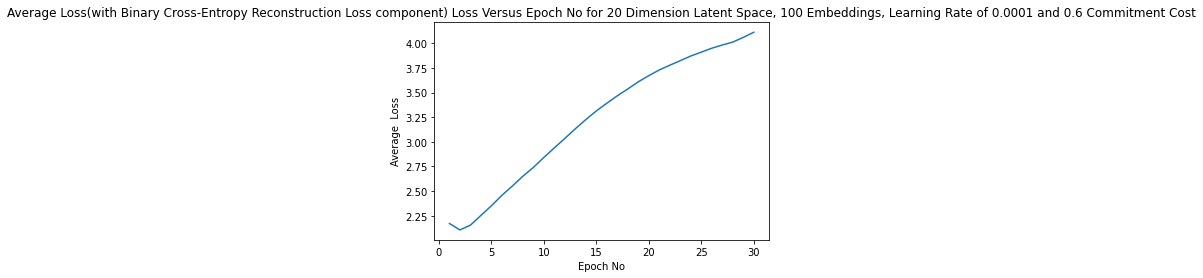

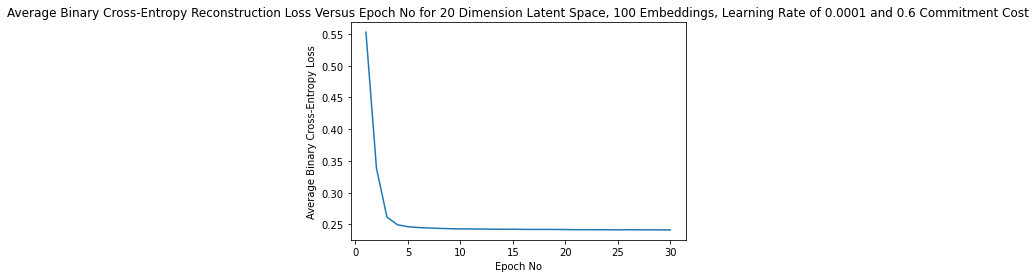

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.2925543785095215
tensor(1.4629, device='cuda:0', grad_fn=<DivBackward0>)
1.7554570436477661
hello
0.24497465789318085
tensor(2.1650, device='cuda:0', grad_fn=<DivBackward0>)
2.409977436065674
hello
0.24559232592582703
tensor(2.9731, device='cuda:0', grad_fn=<DivBackward0>)
3.218682050704956
hello
0.24424420297145844
tensor(3.5913, device='cuda:0', grad_fn=<DivBackward0>)
3.8355844020843506
hello
0.24462802708148956
tensor(4.1969, device='cuda:0', grad_fn=<DivBackward0>)
4.441555500030518
hello
0.24331074953079224
tensor(4.4341, device='cuda:0', grad_fn=<DivBackward0>)
4.677451133728027
hello
0.24342083930969238
tensor(4.5444, device='cuda:0', grad_fn=<DivBackward0>)
4.787869453430176
hello
0.24344953894615173
tensor(4.7329, device='cuda:0', grad_fn=<DivBackward0>)
4.976374626159668
hello
0.24279095232486725
tensor(4.7231, device='cuda:0', grad_fn=<DivBackward0>)
4.965926170349121
hello
0.242741659283638
tensor(4.8697, device='cuda:0', grad_fn=<DivBackward0>)
5.112403392791748
h

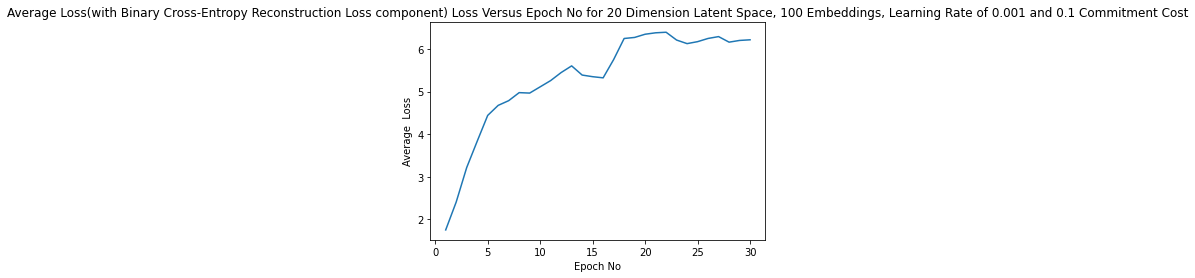

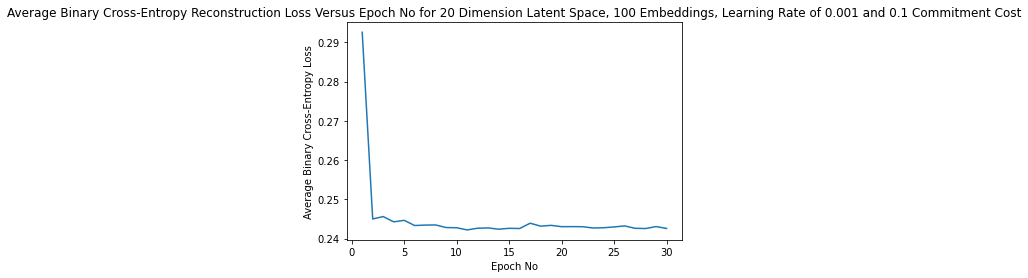

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.2925543785095215
tensor(1.7289, device='cuda:0', grad_fn=<DivBackward0>)
2.021439552307129
hello
0.24497465789318085
tensor(2.5586, device='cuda:0', grad_fn=<DivBackward0>)
2.803615093231201
hello
0.24559232592582703
tensor(3.5137, device='cuda:0', grad_fn=<DivBackward0>)
3.7592458724975586
hello
0.24424420297145844
tensor(4.2443, device='cuda:0', grad_fn=<DivBackward0>)
4.488555431365967
hello
0.24462802708148956
tensor(4.9600, device='cuda:0', grad_fn=<DivBackward0>)
5.204632759094238
hello
0.24331074953079224
tensor(5.2403, device='cuda:0', grad_fn=<DivBackward0>)
5.483654022216797
hello
0.24342083930969238
tensor(5.3707, device='cuda:0', grad_fn=<DivBackward0>)
5.614134788513184
hello
0.24344953894615173
tensor(5.5935, device='cuda:0', grad_fn=<DivBackward0>)
5.836904048919678
hello
0.24279095232486725
tensor(5.5819, device='cuda:0', grad_fn=<DivBackward0>)
5.824673175811768
hello
0.242741659283638
tensor(5.7550, device='cuda:0', grad_fn=<DivBackward0>)
5.997790813446045
he

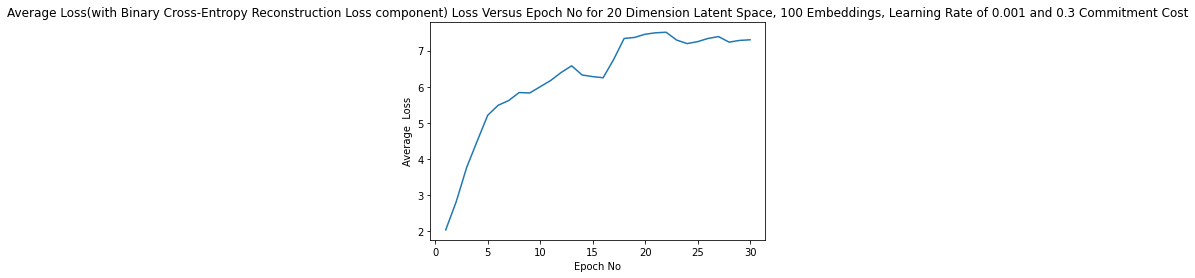

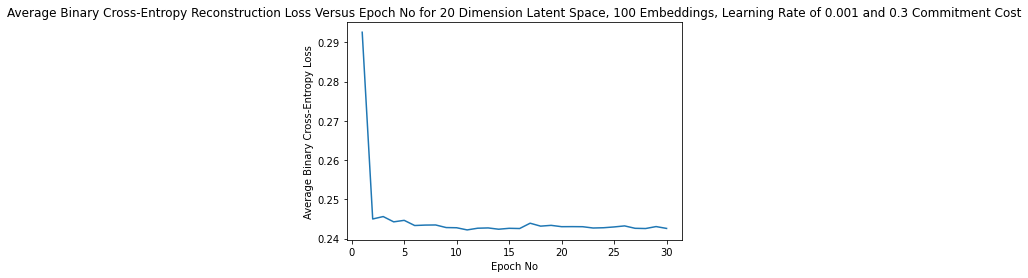

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.2925543785095215
tensor(2.1279, device='cuda:0', grad_fn=<DivBackward0>)
2.420412302017212
hello
0.24497465789318085
tensor(3.1491, device='cuda:0', grad_fn=<DivBackward0>)
3.394070625305176
hello
0.24559232592582703
tensor(4.3245, device='cuda:0', grad_fn=<DivBackward0>)
4.570089340209961
hello
0.24424420297145844
tensor(5.2238, device='cuda:0', grad_fn=<DivBackward0>)
5.46801233291626
hello
0.24462802708148956
tensor(6.1046, device='cuda:0', grad_fn=<DivBackward0>)
6.349254131317139
hello
0.24331074953079224
tensor(6.4497, device='cuda:0', grad_fn=<DivBackward0>)
6.692967414855957
hello
0.24342083930969238
tensor(6.6101, device='cuda:0', grad_fn=<DivBackward0>)
6.853531837463379
hello
0.24344953894615173
tensor(6.8843, device='cuda:0', grad_fn=<DivBackward0>)
7.1277079582214355
hello
0.24279095232486725
tensor(6.8700, device='cuda:0', grad_fn=<DivBackward0>)
7.11280632019043
hello
0.242741659283638
tensor(7.0831, device='cuda:0', grad_fn=<DivBackward0>)
7.325877666473389
hell

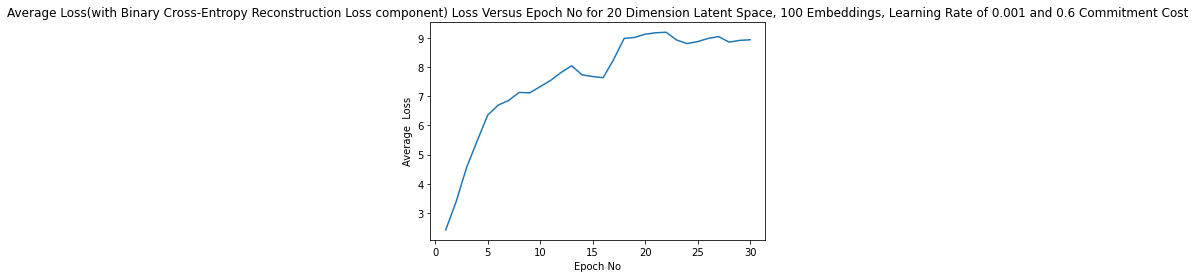

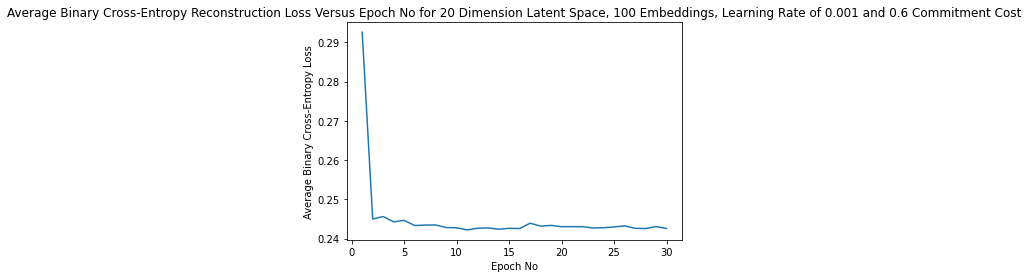

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6695274114608765
tensor(1.0564, device='cuda:0', grad_fn=<DivBackward0>)
1.7259589433670044
hello
0.6219158172607422
tensor(1.0499, device='cuda:0', grad_fn=<DivBackward0>)
1.6718043088912964
hello
0.5941555500030518
tensor(1.0508, device='cuda:0', grad_fn=<DivBackward0>)
1.6449066400527954
hello
0.5597884654998779
tensor(1.0509, device='cuda:0', grad_fn=<DivBackward0>)
1.6107301712036133
hello
0.5157815217971802
tensor(1.0534, device='cuda:0', grad_fn=<DivBackward0>)
1.5691689252853394
hello
0.4674549996852875
tensor(1.0567, device='cuda:0', grad_fn=<DivBackward0>)
1.5241949558258057
hello
0.425353467464447
tensor(1.0602, device='cuda:0', grad_fn=<DivBackward0>)
1.4855499267578125
hello
0.39077937602996826
tensor(1.0642, device='cuda:0', grad_fn=<DivBackward0>)
1.4550279378890991
hello
0.3622167408466339
tensor(1.0693, device='cuda:0', grad_fn=<DivBackward0>)
1.4315476417541504
hello
0.3427881598472595
tensor(1.0752, device='cuda:0', grad_fn=<DivBackward0>)
1.4180033206939697


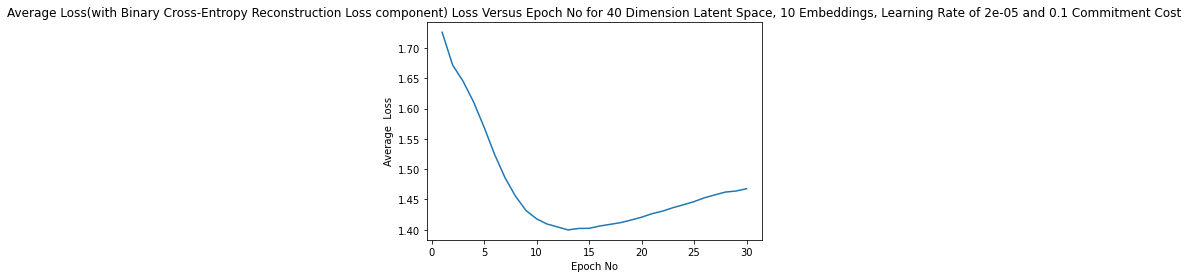

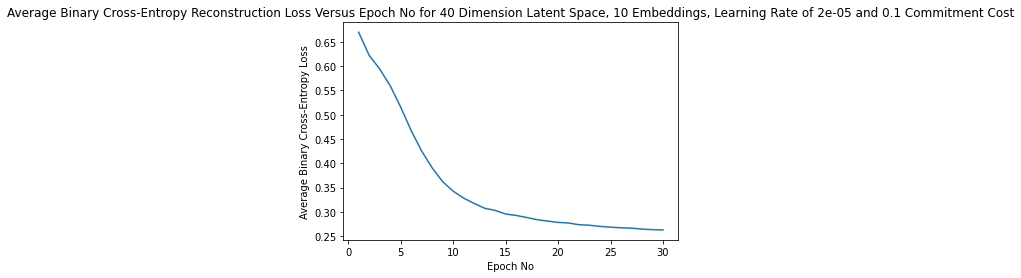

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6695274114608765
tensor(1.2485, device='cuda:0', grad_fn=<DivBackward0>)
1.9180374145507812
hello
0.6219158172607422
tensor(1.2408, device='cuda:0', grad_fn=<DivBackward0>)
1.8626927137374878
hello
0.5941555500030518
tensor(1.2418, device='cuda:0', grad_fn=<DivBackward0>)
1.8359533548355103
hello
0.5597884654998779
tensor(1.2420, device='cuda:0', grad_fn=<DivBackward0>)
1.8018105030059814
hello
0.5157815217971802
tensor(1.2449, device='cuda:0', grad_fn=<DivBackward0>)
1.7606943845748901
hello
0.4674549996852875
tensor(1.2489, device='cuda:0', grad_fn=<DivBackward0>)
1.7163288593292236
hello
0.425353467464447
tensor(1.2530, device='cuda:0', grad_fn=<DivBackward0>)
1.6783127784729004
hello
0.39077937602996826
tensor(1.2577, device='cuda:0', grad_fn=<DivBackward0>)
1.6485270261764526
hello
0.3622167408466339
tensor(1.2638, device='cuda:0', grad_fn=<DivBackward0>)
1.6259709596633911
hello
0.3427881598472595
tensor(1.2707, device='cuda:0', grad_fn=<DivBackward0>)
1.6134958267211914


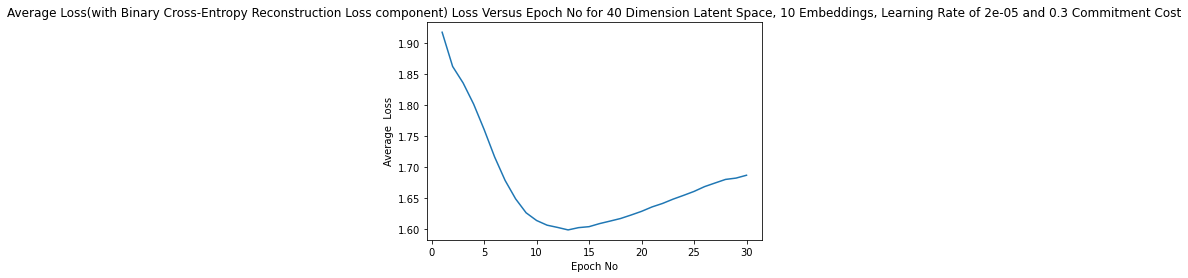

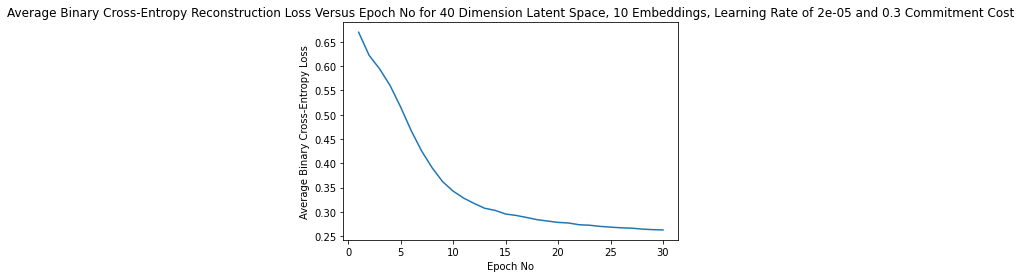

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6695274114608765
tensor(1.5366, device='cuda:0', grad_fn=<DivBackward0>)
2.20615553855896
hello
0.6219158172607422
tensor(1.5271, device='cuda:0', grad_fn=<DivBackward0>)
2.1490252017974854
hello
0.5941555500030518
tensor(1.5284, device='cuda:0', grad_fn=<DivBackward0>)
2.1225218772888184
hello
0.5597884654998779
tensor(1.5286, device='cuda:0', grad_fn=<DivBackward0>)
2.088430881500244
hello
0.5157815217971802
tensor(1.5322, device='cuda:0', grad_fn=<DivBackward0>)
2.0479822158813477
hello
0.4674549996852875
tensor(1.5371, device='cuda:0', grad_fn=<DivBackward0>)
2.0045294761657715
hello
0.425353467464447
tensor(1.5421, device='cuda:0', grad_fn=<DivBackward0>)
1.9674568176269531
hello
0.39077937602996826
tensor(1.5480, device='cuda:0', grad_fn=<DivBackward0>)
1.9387761354446411
hello
0.3622167408466339
tensor(1.5554, device='cuda:0', grad_fn=<DivBackward0>)
1.917605996131897
hello
0.3427881598472595
tensor(1.5639, device='cuda:0', grad_fn=<DivBackward0>)
1.9067378044128418
hell

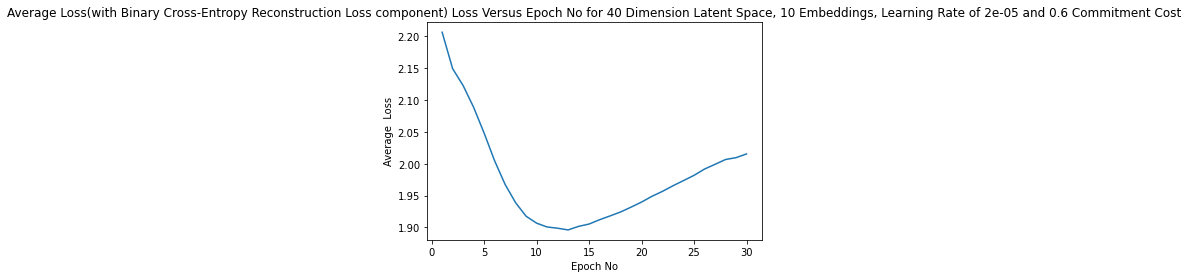

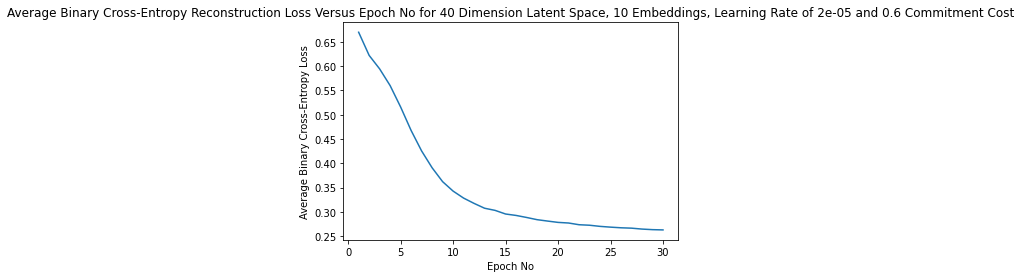

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5939760208129883
tensor(1.0485, device='cuda:0', grad_fn=<DivBackward0>)
1.6424604654312134
hello
0.3979368507862091
tensor(1.0611, device='cuda:0', grad_fn=<DivBackward0>)
1.459031105041504
hello
0.3157798647880554
tensor(1.0886, device='cuda:0', grad_fn=<DivBackward0>)
1.4043376445770264
hello
0.29400163888931274
tensor(1.1151, device='cuda:0', grad_fn=<DivBackward0>)
1.4091436862945557
hello
0.28291404247283936
tensor(1.1377, device='cuda:0', grad_fn=<DivBackward0>)
1.4206163883209229
hello
0.27535155415534973
tensor(1.1640, device='cuda:0', grad_fn=<DivBackward0>)
1.4393584728240967
hello
0.2691270411014557
tensor(1.1839, device='cuda:0', grad_fn=<DivBackward0>)
1.4529969692230225
hello
0.26542195677757263
tensor(1.1953, device='cuda:0', grad_fn=<DivBackward0>)
1.4607633352279663
hello
0.26210373640060425
tensor(1.2092, device='cuda:0', grad_fn=<DivBackward0>)
1.4713315963745117
hello
0.2605326771736145
tensor(1.2153, device='cuda:0', grad_fn=<DivBackward0>)
1.4758207798004

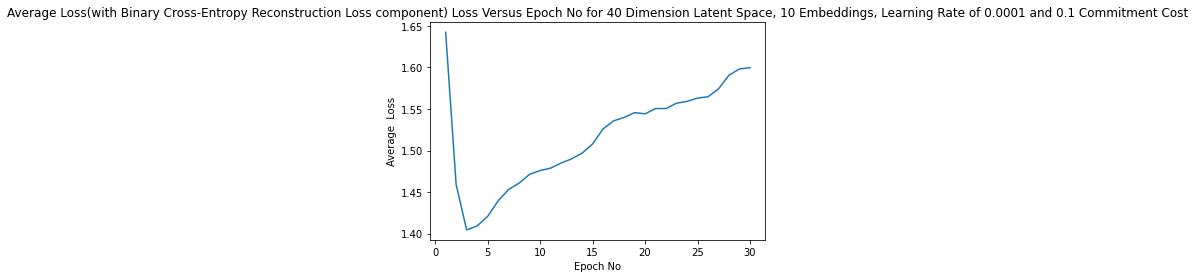

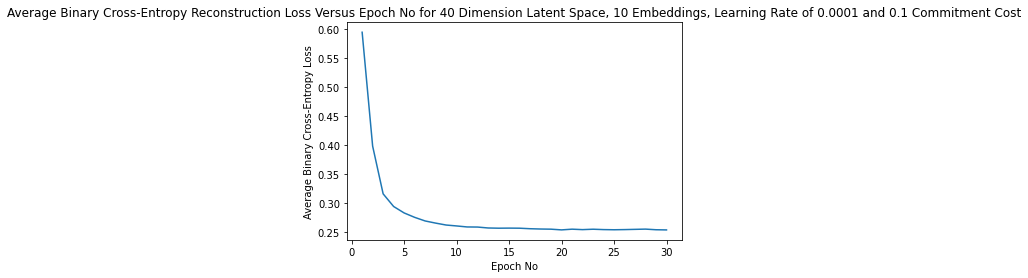

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5939760208129883
tensor(1.2391, device='cuda:0', grad_fn=<DivBackward0>)
1.8330951929092407
hello
0.3979368507862091
tensor(1.2540, device='cuda:0', grad_fn=<DivBackward0>)
1.6519575119018555
hello
0.3157798647880554
tensor(1.2865, device='cuda:0', grad_fn=<DivBackward0>)
1.6022584438323975
hello
0.29400163888931274
tensor(1.3179, device='cuda:0', grad_fn=<DivBackward0>)
1.6118972301483154
hello
0.28291404247283936
tensor(1.3446, device='cuda:0', grad_fn=<DivBackward0>)
1.62747061252594
hello
0.27535155415534973
tensor(1.3756, device='cuda:0', grad_fn=<DivBackward0>)
1.6509959697723389
hello
0.2691270411014557
tensor(1.3991, device='cuda:0', grad_fn=<DivBackward0>)
1.6682463884353638
hello
0.26542195677757263
tensor(1.4127, device='cuda:0', grad_fn=<DivBackward0>)
1.6780976057052612
hello
0.26210373640060425
tensor(1.4291, device='cuda:0', grad_fn=<DivBackward0>)
1.6911921501159668
hello
0.2605326771736145
tensor(1.4362, device='cuda:0', grad_fn=<DivBackward0>)
1.69678211212158

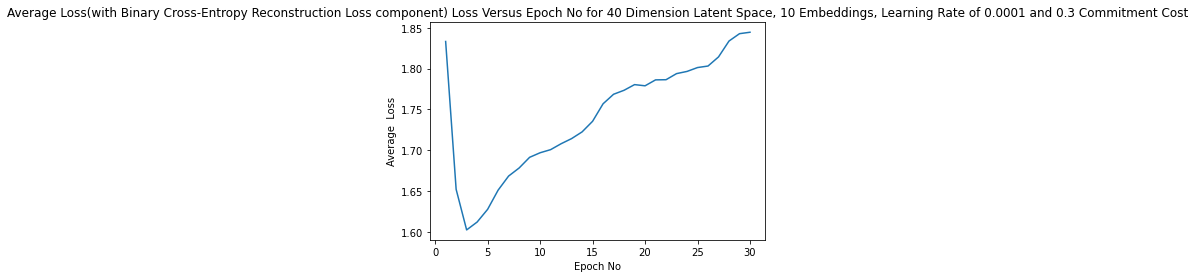

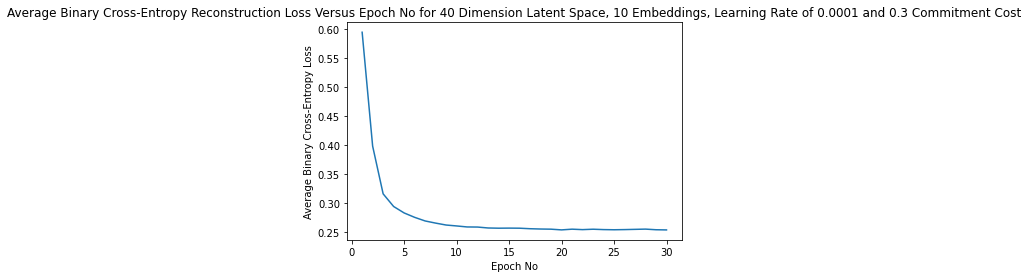

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.5939760208129883
tensor(1.5251, device='cuda:0', grad_fn=<DivBackward0>)
2.119044065475464
hello
0.3979368507862091
tensor(1.5434, device='cuda:0', grad_fn=<DivBackward0>)
1.9413470029830933
hello
0.3157798647880554
tensor(1.5834, device='cuda:0', grad_fn=<DivBackward0>)
1.8991365432739258
hello
0.29400163888931274
tensor(1.6220, device='cuda:0', grad_fn=<DivBackward0>)
1.9160265922546387
hello
0.28291404247283936
tensor(1.6548, device='cuda:0', grad_fn=<DivBackward0>)
1.9377532005310059
hello
0.27535155415534973
tensor(1.6931, device='cuda:0', grad_fn=<DivBackward0>)
1.9684529304504395
hello
0.2691270411014557
tensor(1.7220, device='cuda:0', grad_fn=<DivBackward0>)
1.9911203384399414
hello
0.26542195677757263
tensor(1.7387, device='cuda:0', grad_fn=<DivBackward0>)
2.0040996074676514
hello
0.26210373640060425
tensor(1.7589, device='cuda:0', grad_fn=<DivBackward0>)
2.020979881286621
hello
0.2605326771736145
tensor(1.7677, device='cuda:0', grad_fn=<DivBackward0>)
2.02822494506835

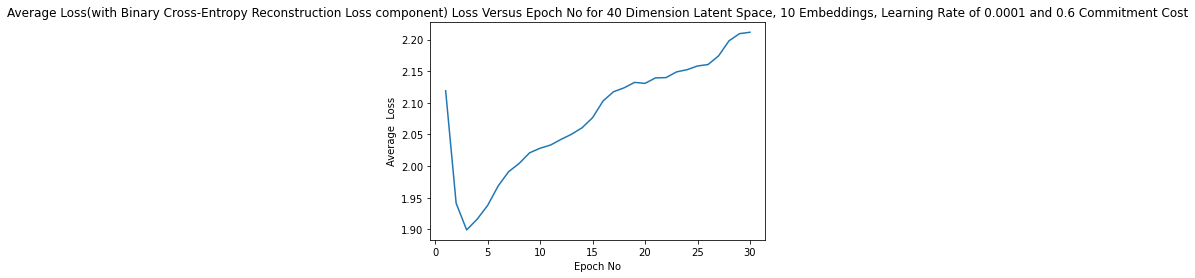

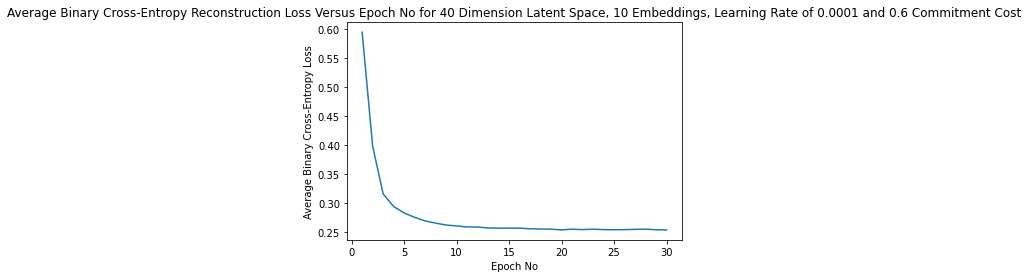

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3409840762615204
tensor(1.0646, device='cuda:0', grad_fn=<DivBackward0>)
1.4055976867675781
hello
0.2608605921268463
tensor(1.2027, device='cuda:0', grad_fn=<DivBackward0>)
1.4635615348815918
hello
0.2581711709499359
tensor(1.3308, device='cuda:0', grad_fn=<DivBackward0>)
1.5889461040496826
hello
0.25646713376045227
tensor(1.3795, device='cuda:0', grad_fn=<DivBackward0>)
1.63600754737854
hello
0.25565582513809204
tensor(1.3411, device='cuda:0', grad_fn=<DivBackward0>)
1.5967833995819092
hello
0.25518563389778137
tensor(1.3815, device='cuda:0', grad_fn=<DivBackward0>)
1.6367061138153076
hello
0.2554596960544586
tensor(1.4151, device='cuda:0', grad_fn=<DivBackward0>)
1.6705584526062012
hello
0.25502410531044006
tensor(1.4603, device='cuda:0', grad_fn=<DivBackward0>)
1.715326189994812
hello
0.255243182182312
tensor(1.4632, device='cuda:0', grad_fn=<DivBackward0>)
1.7184499502182007
hello
0.25659289956092834
tensor(1.4463, device='cuda:0', grad_fn=<DivBackward0>)
1.7029099464416504

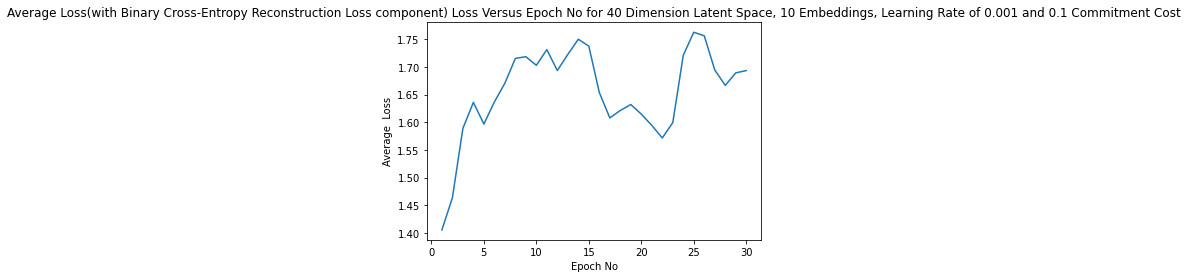

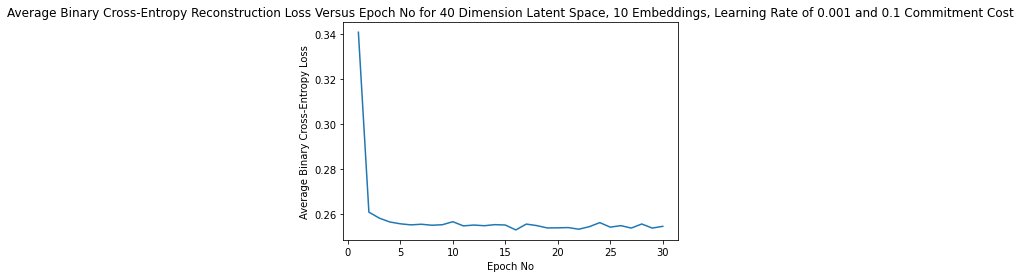

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3409840762615204
tensor(1.2582, device='cuda:0', grad_fn=<DivBackward0>)
1.5991636514663696
hello
0.2608605921268463
tensor(1.4214, device='cuda:0', grad_fn=<DivBackward0>)
1.6822340488433838
hello
0.2581711709499359
tensor(1.5727, device='cuda:0', grad_fn=<DivBackward0>)
1.8309062719345093
hello
0.25646713376045227
tensor(1.6304, device='cuda:0', grad_fn=<DivBackward0>)
1.8868331909179688
hello
0.25565582513809204
tensor(1.5850, device='cuda:0', grad_fn=<DivBackward0>)
1.8406245708465576
hello
0.25518563389778137
tensor(1.6327, device='cuda:0', grad_fn=<DivBackward0>)
1.8878910541534424
hello
0.2554596960544586
tensor(1.6724, device='cuda:0', grad_fn=<DivBackward0>)
1.9278478622436523
hello
0.25502410531044006
tensor(1.7258, device='cuda:0', grad_fn=<DivBackward0>)
1.9808349609375
hello
0.255243182182312
tensor(1.7292, device='cuda:0', grad_fn=<DivBackward0>)
1.9844870567321777
hello
0.25659289956092834
tensor(1.7093, device='cuda:0', grad_fn=<DivBackward0>)
1.9658757448196411

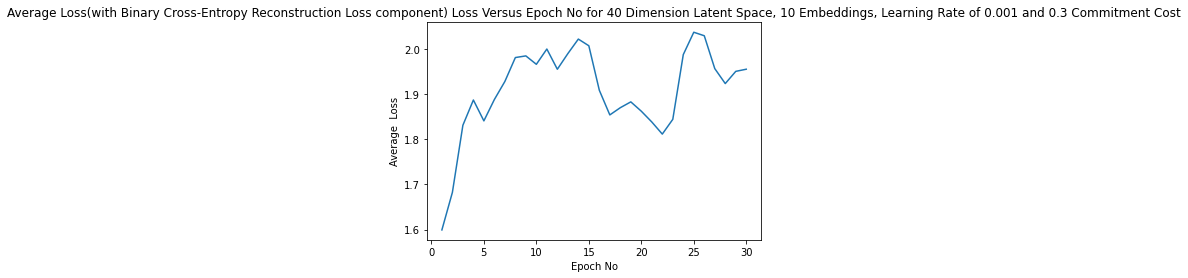

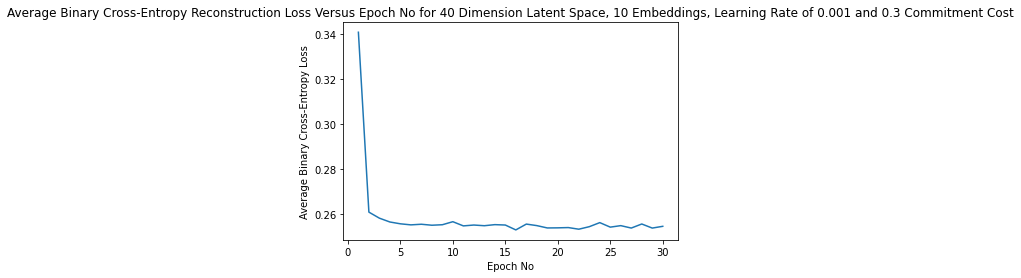

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.3409840762615204
tensor(1.5485, device='cuda:0', grad_fn=<DivBackward0>)
1.8895127773284912
hello
0.2608605921268463
tensor(1.7494, device='cuda:0', grad_fn=<DivBackward0>)
2.0102434158325195
hello
0.2581711709499359
tensor(1.9357, device='cuda:0', grad_fn=<DivBackward0>)
2.193843364715576
hello
0.25646713376045227
tensor(2.0066, device='cuda:0', grad_fn=<DivBackward0>)
2.2630717754364014
hello
0.25565582513809204
tensor(1.9507, device='cuda:0', grad_fn=<DivBackward0>)
2.2063872814178467
hello
0.25518563389778137
tensor(2.0095, device='cuda:0', grad_fn=<DivBackward0>)
2.2646687030792236
hello
0.2554596960544586
tensor(2.0583, device='cuda:0', grad_fn=<DivBackward0>)
2.3137848377227783
hello
0.25502410531044006
tensor(2.1241, device='cuda:0', grad_fn=<DivBackward0>)
2.379098415374756
hello
0.255243182182312
tensor(2.1283, device='cuda:0', grad_fn=<DivBackward0>)
2.383544921875
hello
0.25659289956092834
tensor(2.1037, device='cuda:0', grad_fn=<DivBackward0>)
2.3603270053863525
he

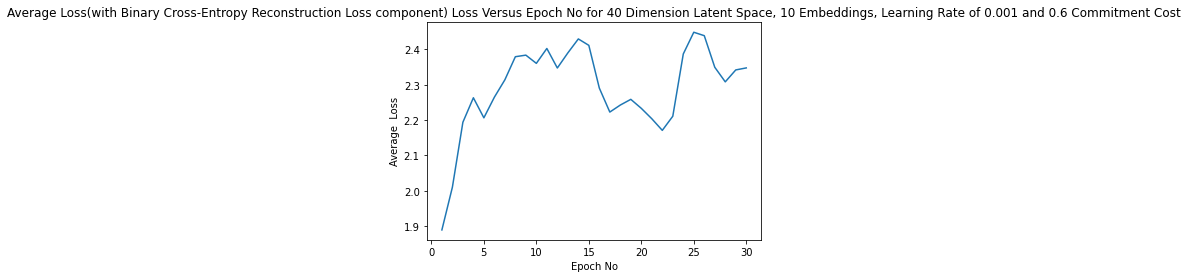

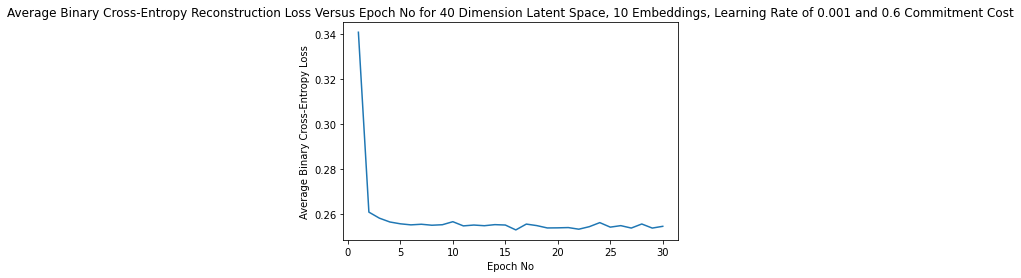

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6367978453636169
tensor(1.0974, device='cuda:0', grad_fn=<DivBackward0>)
1.7342102527618408
hello
0.5605420470237732
tensor(1.1168, device='cuda:0', grad_fn=<DivBackward0>)
1.6773021221160889
hello
0.48763594031333923
tensor(1.1392, device='cuda:0', grad_fn=<DivBackward0>)
1.6268202066421509
hello
0.41499605774879456
tensor(1.1636, device='cuda:0', grad_fn=<DivBackward0>)
1.5785744190216064
hello
0.3553055226802826
tensor(1.1862, device='cuda:0', grad_fn=<DivBackward0>)
1.5415184497833252
hello
0.3121740520000458
tensor(1.2065, device='cuda:0', grad_fn=<DivBackward0>)
1.5187097787857056
hello
0.28452280163764954
tensor(1.2245, device='cuda:0', grad_fn=<DivBackward0>)
1.5090004205703735
hello
0.2684318721294403
tensor(1.2420, device='cuda:0', grad_fn=<DivBackward0>)
1.510425329208374
hello
0.2588732838630676
tensor(1.2597, device='cuda:0', grad_fn=<DivBackward0>)
1.51859450340271
hello
0.2531832456588745
tensor(1.2775, device='cuda:0', grad_fn=<DivBackward0>)
1.530670166015625
h

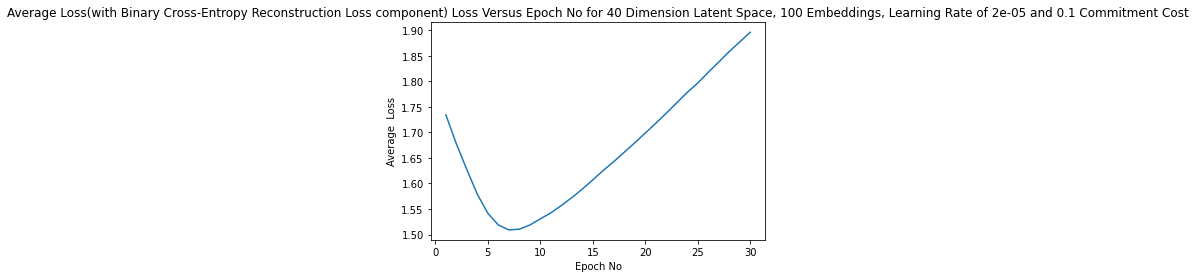

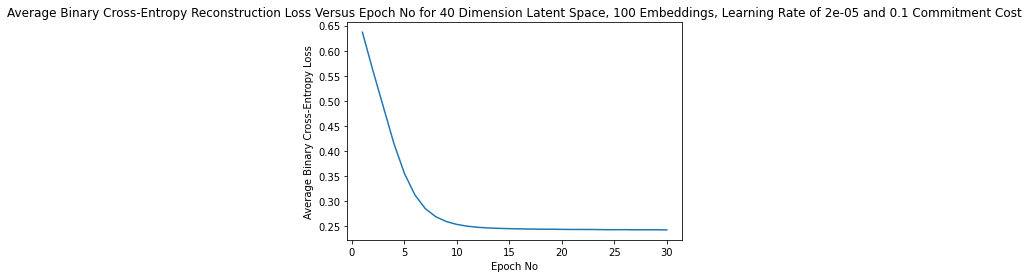

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6367978453636169
tensor(1.2969, device='cuda:0', grad_fn=<DivBackward0>)
1.9337396621704102
hello
0.5605420470237732
tensor(1.3198, device='cuda:0', grad_fn=<DivBackward0>)
1.8803493976593018
hello
0.48763594031333923
tensor(1.3463, device='cuda:0', grad_fn=<DivBackward0>)
1.8339450359344482
hello
0.41499605774879456
tensor(1.3751, device='cuda:0', grad_fn=<DivBackward0>)
1.790134072303772
hello
0.3553055226802826
tensor(1.4019, device='cuda:0', grad_fn=<DivBackward0>)
1.7571932077407837
hello
0.3121740520000458
tensor(1.4259, device='cuda:0', grad_fn=<DivBackward0>)
1.738079309463501
hello
0.28452280163764954
tensor(1.4471, device='cuda:0', grad_fn=<DivBackward0>)
1.7316316366195679
hello
0.2684318721294403
tensor(1.4678, device='cuda:0', grad_fn=<DivBackward0>)
1.7362421751022339
hello
0.2588732838630676
tensor(1.4888, device='cuda:0', grad_fn=<DivBackward0>)
1.7476351261138916
hello
0.2531832456588745
tensor(1.5098, device='cuda:0', grad_fn=<DivBackward0>)
1.7629406452178955

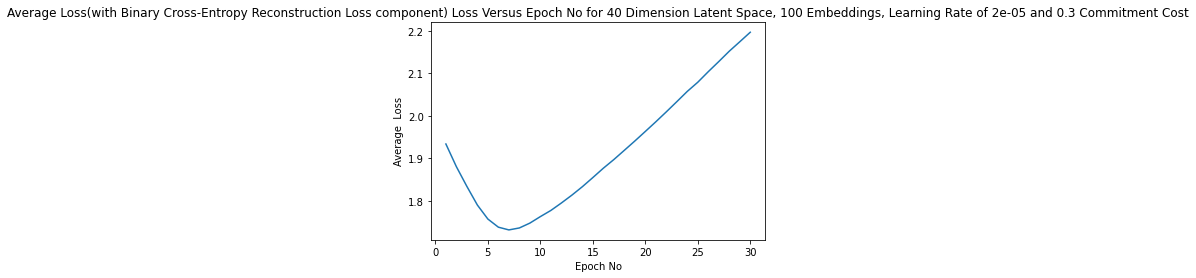

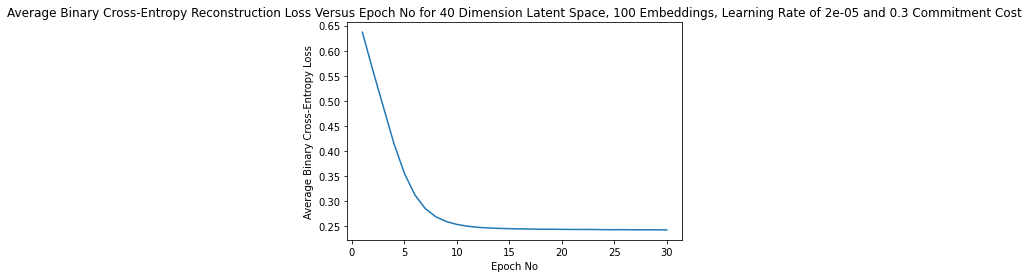

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.6367978453636169
tensor(1.5962, device='cuda:0', grad_fn=<DivBackward0>)
2.2330331802368164
hello
0.5605420470237732
tensor(1.6244, device='cuda:0', grad_fn=<DivBackward0>)
2.184920072555542
hello
0.48763594031333923
tensor(1.6570, device='cuda:0', grad_fn=<DivBackward0>)
2.1446332931518555
hello
0.41499605774879456
tensor(1.6925, device='cuda:0', grad_fn=<DivBackward0>)
2.1074726581573486
hello
0.3553055226802826
tensor(1.7254, device='cuda:0', grad_fn=<DivBackward0>)
2.0807061195373535
hello
0.3121740520000458
tensor(1.7550, device='cuda:0', grad_fn=<DivBackward0>)
2.067135810852051
hello
0.28452280163764954
tensor(1.7811, device='cuda:0', grad_fn=<DivBackward0>)
2.0655808448791504
hello
0.2684318721294403
tensor(1.8065, device='cuda:0', grad_fn=<DivBackward0>)
2.074968099594116
hello
0.2588732838630676
tensor(1.8323, device='cuda:0', grad_fn=<DivBackward0>)
2.0911974906921387
hello
0.2531832456588745
tensor(1.8582, device='cuda:0', grad_fn=<DivBackward0>)
2.11134672164917
he

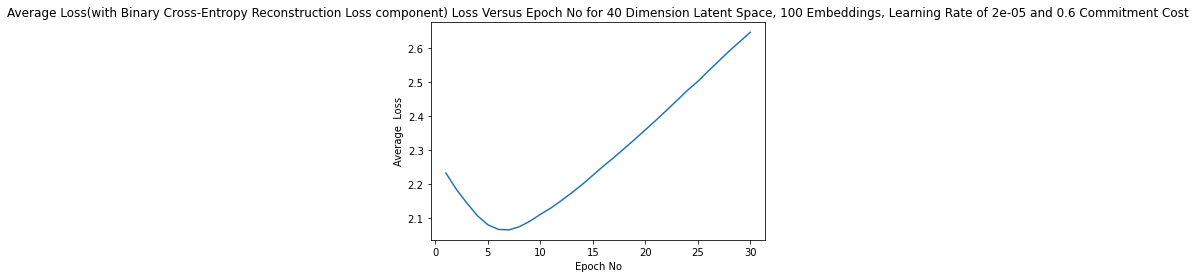

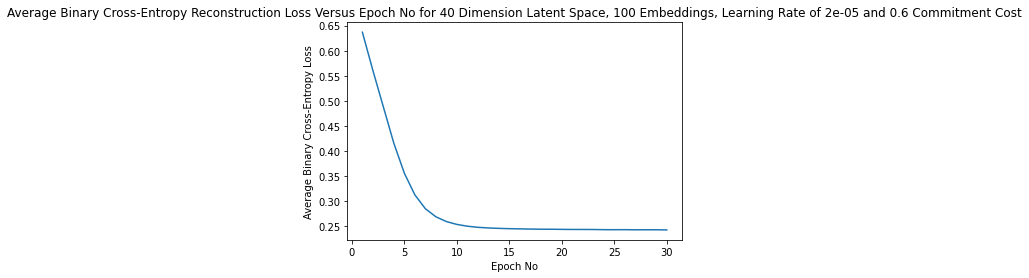

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.4862920939922333
tensor(1.1396, device='cuda:0', grad_fn=<DivBackward0>)
1.6258518695831299
hello
0.2749694585800171
tensor(1.2496, device='cuda:0', grad_fn=<DivBackward0>)
1.5245416164398193
hello
0.249888613820076
tensor(1.3482, device='cuda:0', grad_fn=<DivBackward0>)
1.5980883836746216
hello
0.24566279351711273
tensor(1.4393, device='cuda:0', grad_fn=<DivBackward0>)
1.684930682182312
hello
0.2444765567779541
tensor(1.5329, device='cuda:0', grad_fn=<DivBackward0>)
1.777405023574829
hello
0.24365739524364471
tensor(1.6259, device='cuda:0', grad_fn=<DivBackward0>)
1.8695143461227417
hello
0.24310728907585144
tensor(1.7254, device='cuda:0', grad_fn=<DivBackward0>)
1.9684799909591675
hello
0.24322350323200226
tensor(1.8197, device='cuda:0', grad_fn=<DivBackward0>)
2.062901496887207
hello
0.2425745576620102
tensor(1.9110, device='cuda:0', grad_fn=<DivBackward0>)
2.153588056564331
hello
0.2427099198102951
tensor(2.0111, device='cuda:0', grad_fn=<DivBackward0>)
2.2538111209869385
h

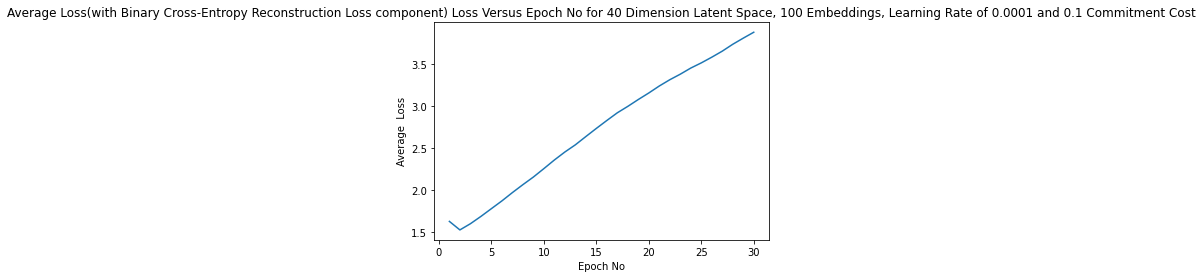

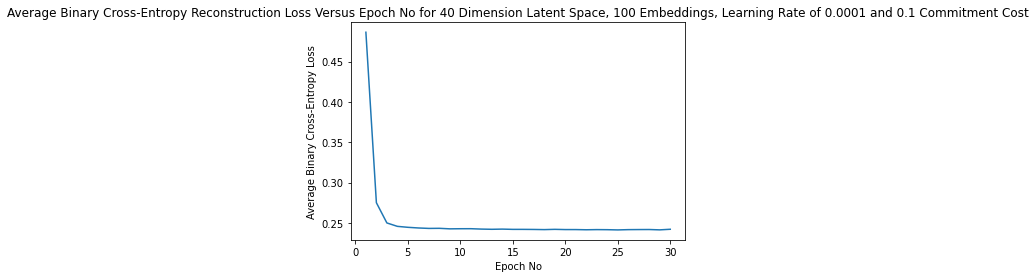

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.4862920939922333
tensor(1.3468, device='cuda:0', grad_fn=<DivBackward0>)
1.8330447673797607
hello
0.2749694585800171
tensor(1.4768, device='cuda:0', grad_fn=<DivBackward0>)
1.7517369985580444
hello
0.249888613820076
tensor(1.5933, device='cuda:0', grad_fn=<DivBackward0>)
1.8432151079177856
hello
0.24566279351711273
tensor(1.7010, device='cuda:0', grad_fn=<DivBackward0>)
1.9466159343719482
hello
0.2444765567779541
tensor(1.8116, device='cuda:0', grad_fn=<DivBackward0>)
2.056119203567505
hello
0.24365739524364471
tensor(1.9215, device='cuda:0', grad_fn=<DivBackward0>)
2.1651253700256348
hello
0.24310728907585144
tensor(2.0391, device='cuda:0', grad_fn=<DivBackward0>)
2.2821848392486572
hello
0.24322350323200226
tensor(2.1505, device='cuda:0', grad_fn=<DivBackward0>)
2.3937535285949707
hello
0.2425745576620102
tensor(2.2585, device='cuda:0', grad_fn=<DivBackward0>)
2.501044511795044
hello
0.2427099198102951
tensor(2.3768, device='cuda:0', grad_fn=<DivBackward0>)
2.61946702003479
h

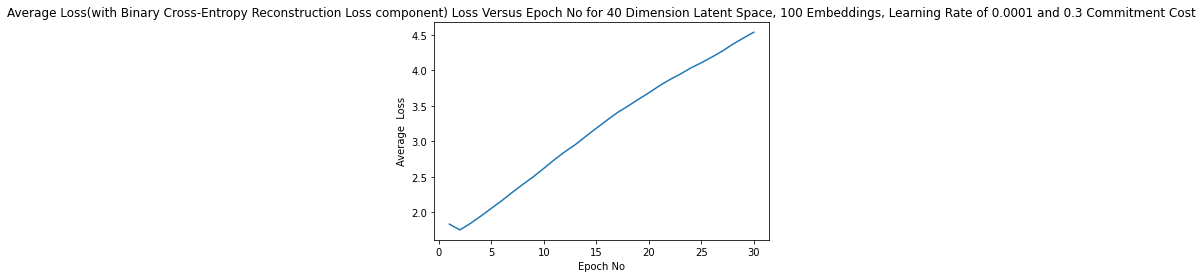

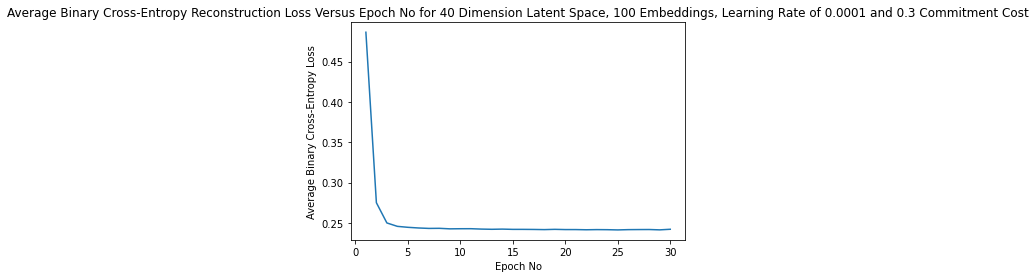

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.4862920939922333
tensor(1.6575, device='cuda:0', grad_fn=<DivBackward0>)
2.1438353061676025
hello
0.2749694585800171
tensor(1.8176, device='cuda:0', grad_fn=<DivBackward0>)
2.0925278663635254
hello
0.249888613820076
tensor(1.9610, device='cuda:0', grad_fn=<DivBackward0>)
2.210906744003296
hello
0.24566279351711273
tensor(2.0935, device='cuda:0', grad_fn=<DivBackward0>)
2.339142322540283
hello
0.2444765567779541
tensor(2.2297, device='cuda:0', grad_fn=<DivBackward0>)
2.4741897583007812
hello
0.24365739524364471
tensor(2.3649, device='cuda:0', grad_fn=<DivBackward0>)
2.608539342880249
hello
0.24310728907585144
tensor(2.5096, device='cuda:0', grad_fn=<DivBackward0>)
2.7527401447296143
hello
0.24322350323200226
tensor(2.6468, device='cuda:0', grad_fn=<DivBackward0>)
2.890028953552246
hello
0.2425745576620102
tensor(2.7797, device='cuda:0', grad_fn=<DivBackward0>)
3.022230625152588
hello
0.2427099198102951
tensor(2.9252, device='cuda:0', grad_fn=<DivBackward0>)
3.1679489612579346
he

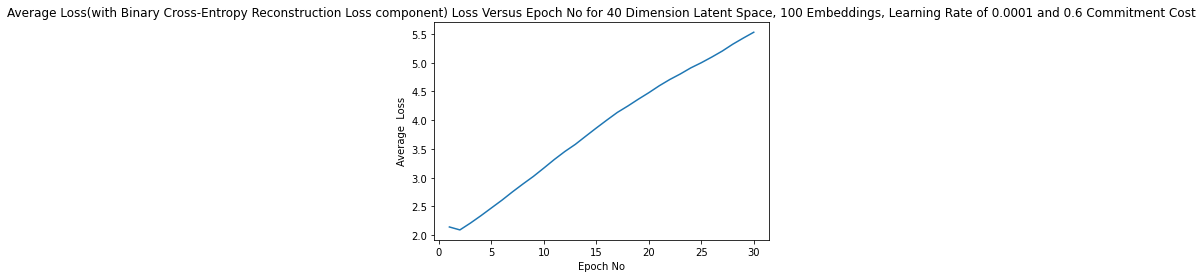

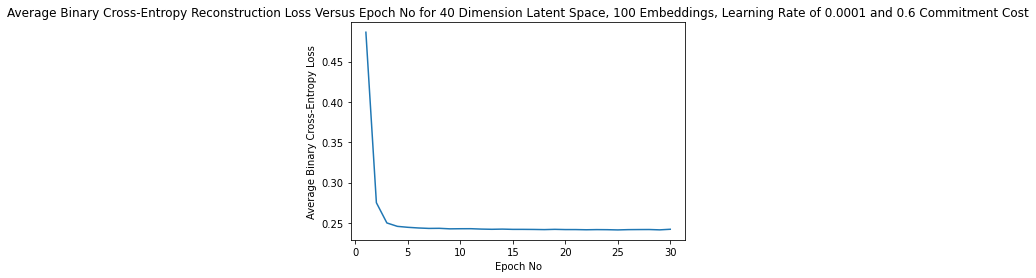

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.27838483452796936
tensor(1.5453, device='cuda:0', grad_fn=<DivBackward0>)
1.8236682415008545
hello
0.24611325562000275
tensor(2.6384, device='cuda:0', grad_fn=<DivBackward0>)
2.8845293521881104
hello
0.2439308911561966
tensor(3.6114, device='cuda:0', grad_fn=<DivBackward0>)
3.855283498764038
hello
0.24392789602279663
tensor(4.5677, device='cuda:0', grad_fn=<DivBackward0>)
4.811625003814697
hello
0.24454540014266968
tensor(5.4848, device='cuda:0', grad_fn=<DivBackward0>)
5.7293701171875
hello
0.24309991300106049
tensor(6.3022, device='cuda:0', grad_fn=<DivBackward0>)
6.545346736907959
hello
0.24233883619308472
tensor(6.6599, device='cuda:0', grad_fn=<DivBackward0>)
6.902276992797852
hello
0.24288737773895264
tensor(7.2546, device='cuda:0', grad_fn=<DivBackward0>)
7.497530460357666
hello
0.24325013160705566
tensor(7.9749, device='cuda:0', grad_fn=<DivBackward0>)
8.218100547790527
hello
0.24333350360393524
tensor(8.7430, device='cuda:0', grad_fn=<DivBackward0>)
8.986331939697266
h

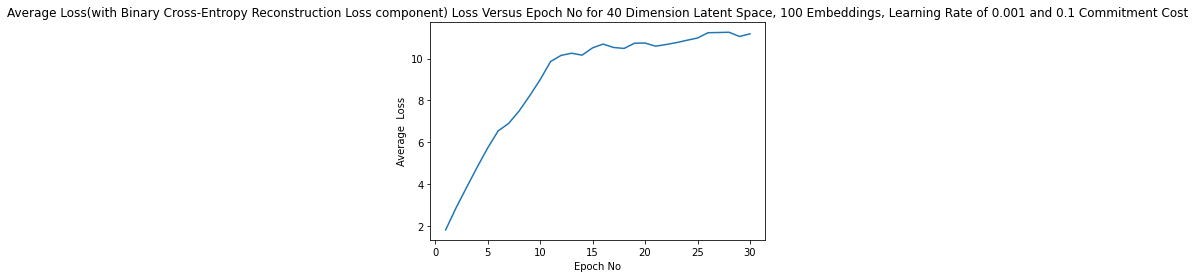

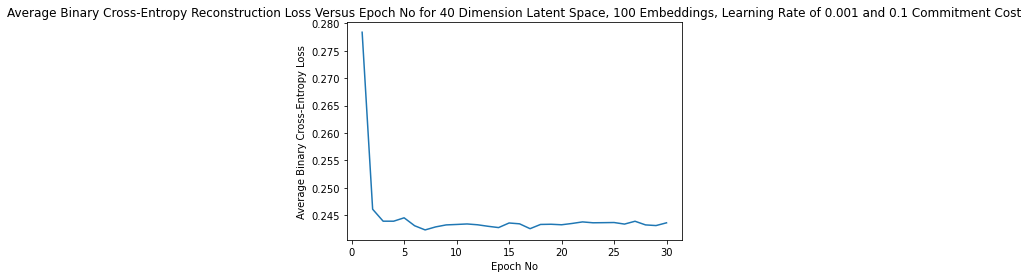

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.27838483452796936
tensor(1.8262, device='cuda:0', grad_fn=<DivBackward0>)
2.104628801345825
hello
0.24611325562000275
tensor(3.1181, device='cuda:0', grad_fn=<DivBackward0>)
3.3642406463623047
hello
0.2439308911561966
tensor(4.2680, device='cuda:0', grad_fn=<DivBackward0>)
4.511895656585693
hello
0.24392789602279663
tensor(5.3982, device='cuda:0', grad_fn=<DivBackward0>)
5.642115116119385
hello
0.24454540014266968
tensor(6.4821, device='cuda:0', grad_fn=<DivBackward0>)
6.726609706878662
hello
0.24309991300106049
tensor(7.4481, device='cuda:0', grad_fn=<DivBackward0>)
7.691209316253662
hello
0.24233883619308472
tensor(7.8708, device='cuda:0', grad_fn=<DivBackward0>)
8.113178253173828
hello
0.24288737773895264
tensor(8.5737, device='cuda:0', grad_fn=<DivBackward0>)
8.81655502319336
hello
0.24325013160705566
tensor(9.4248, device='cuda:0', grad_fn=<DivBackward0>)
9.668067932128906
hello
0.24333350360393524
tensor(10.3326, device='cuda:0', grad_fn=<DivBackward0>)
10.57596492767334


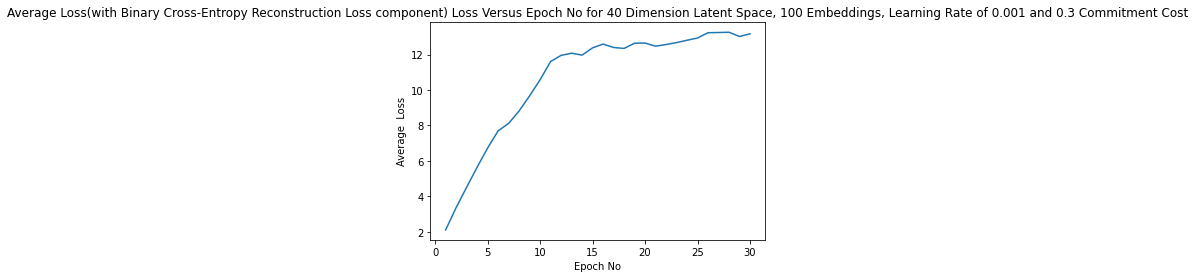

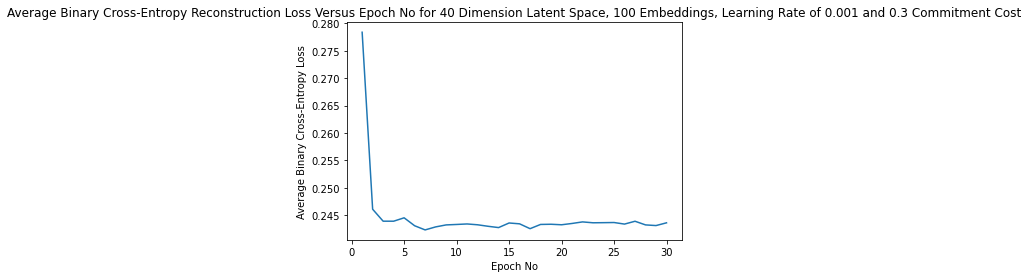

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


hello
0.27838483452796936
tensor(2.2477, device='cuda:0', grad_fn=<DivBackward0>)
2.5260698795318604
hello
0.24611325562000275
tensor(3.8377, device='cuda:0', grad_fn=<DivBackward0>)
4.083807468414307
hello
0.2439308911561966
tensor(5.2529, device='cuda:0', grad_fn=<DivBackward0>)
5.4968109130859375
hello
0.24392789602279663
tensor(6.6439, device='cuda:0', grad_fn=<DivBackward0>)
6.887852668762207
hello
0.24454540014266968
tensor(7.9779, device='cuda:0', grad_fn=<DivBackward0>)
8.222472190856934
hello
0.24309991300106049
tensor(9.1669, device='cuda:0', grad_fn=<DivBackward0>)
9.410001754760742
hello
0.24233883619308472
tensor(9.6872, device='cuda:0', grad_fn=<DivBackward0>)
9.929523468017578
hello
0.24288737773895264
tensor(10.5522, device='cuda:0', grad_fn=<DivBackward0>)
10.795100212097168
hello
0.24325013160705566
tensor(11.5998, device='cuda:0', grad_fn=<DivBackward0>)
11.84302806854248
hello
0.24333350360393524
tensor(12.7171, device='cuda:0', grad_fn=<DivBackward0>)
12.9604253768

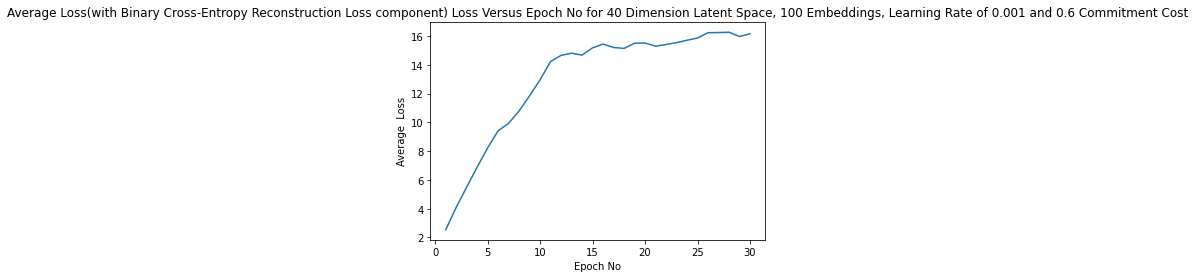

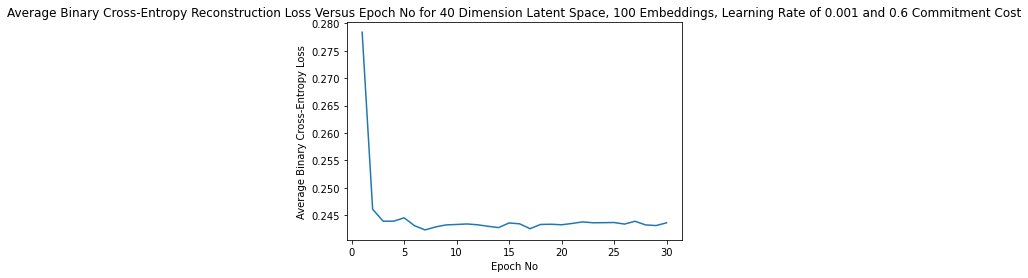

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
mod,ssim,ssimtest,indices=TRAINVALTEST()

In [13]:
ssim

array([[[[0.00532044, 0.00532044, 0.00532044],
         [0.00722822, 0.00722822, 0.00722822],
         [0.00739091, 0.00739091, 0.00739091]],

        [[0.00780794, 0.00780794, 0.00780794],
         [0.00798452, 0.00798452, 0.00798452],
         [0.00824113, 0.00824113, 0.00824113]]],


       [[[0.00594842, 0.00594842, 0.00594842],
         [0.00706568, 0.00706568, 0.00706568],
         [0.00682039, 0.00682039, 0.00682039]],

        [[0.00795663, 0.00795663, 0.00795663],
         [0.0082186 , 0.0082186 , 0.0082186 ],
         [0.00814163, 0.00814163, 0.00814163]]],


       [[[0.00495499, 0.00495499, 0.00495499],
         [0.00670745, 0.00670745, 0.00670745],
         [0.00658319, 0.00658319, 0.00658319]],

        [[0.00802049, 0.00802049, 0.00802049],
         [0.00804202, 0.00804202, 0.00804202],
         [0.00813324, 0.00813324, 0.00813324]]]])

In [10]:
import dill as pickle
with open('goodmodel2.pkl', 'wb') as file:
  pickle.dump(in1,file)

In [25]:
indices

(array([0, 0, 0], dtype=int64),
 array([1, 1, 1], dtype=int64),
 array([2, 2, 2], dtype=int64),
 array([0, 1, 2], dtype=int64))

In [9]:
import numpy as np
x=np.array([[3,4],[5,6]])
t=np.max(x)
m=np.where(x==t)
print(m[1][0])
#y=[1]
#print(y[m[0][0]])

1


In [4]:
x=19000 
y=10
import numpy as np

In [6]:
import torch
import numpy as np
x=torch.tensor(np.array([1]))
print(x+1)

tensor([2], dtype=torch.int32)


In [6]:
np.int32(x)*256*256*y

C:\Users\William\AppData\Local\Temp/ipykernel_24360/268573713.py:1: RuntimeWarning: overflow encountered in long_scalars
  np.int32(x)*256*256*y


-433061888

In [4]:
TRAINDATA,VALIDDATA,TESTDATA,DATALOADER=DataProcess()
#TRAINDATA=TRAINDATA.permute(0, 3, 2, 1).contiguous()
#VALIDDATA=VALIDDATA.permute(0, 3, 2, 1).contiguous()

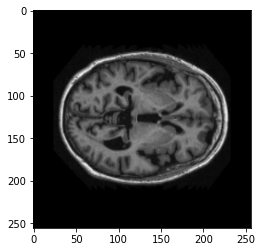

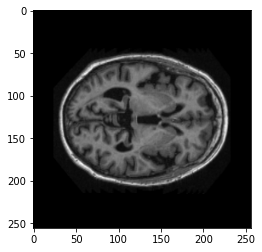

In [15]:
import matplotlib.pyplot as plt
#permute(0, 3, 2, 1)
TRAINDATA1=TRAINDATA.permute(0,3,2,1)
#testing on test datp.yplota set to check for clear image
plt.imshow(TRAINDATA1[9664,:,:,:].detach().numpy().astype('float32'),cmap="Greys_r")
plt.show()
plt.imshow(TRAINDATA1[0,:,:,:].detach().numpy().astype('float32'),cmap="Greys_r")
plt.show()

In [20]:
import re
print((re.search("^[A-Za-z0-9_]*$", 'he llo')))

None


In [9]:
print(TRAINDATA[0,:,:,:].detach().numpy().reshape(256,256,3))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [7]:
TESTDATA=TESTDATA.permute(0,3,2,1).contiguous()

In [18]:
from pandas import DataFrame


x=DataFrame(np.array([1,2]))
x[0,0]=in1

In [4]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict=np.empty((len(VALIDDATA),VALIDDATA.shape[1],VALIDDATA.shape[2],VALIDDATA.shape[3]))
for i in range(0,len(VALIDDATA)):
 #predict[i,:]=mod[18*2+9*indices[1][0]+3*indices[2][0]+indices[3][0]](VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0].cpu().detach().numpy()
 predict[i,:]=in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0].cpu().detach().numpy()
#metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='elementwise_mean')
#ssim=np.empty((len(VALIDDATA)))

#ssim=metric(torch.tensor(np.float32(predict)),VALIDDATA.to(torch.float32))
    


c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [17]:
mod[indices[0][0],indices[1][0],indices[2][0],indices[3][0]]

TypeError: list indices must be integers or slices, not tuple

In [7]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict1=np.empty((len(TESTDATA),TESTDATA.shape[1],TESTDATA.shape[2],TESTDATA.shape[3]))
for i in range(0,len(TESTDATA)):
 predict1[i,:]=in1(TESTDATA[i].cuda().float().reshape((1,TESTDATA[i].shape[0],TESTDATA[i].shape[1],TESTDATA[i].shape[2])))[0].cpu().detach().numpy()

c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [5]:
torch.manual_seed(0)
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim1=0
for i in range(0,112):
 ssim1=metric(torch.tensor(np.float32(predict[range(i*10,(i+1)*10),:])),VALIDDATA.to(torch.float32)[range(i*10,(i+1)*10),:])+ssim1
SSim=ssim1/1120

In [6]:
SSim

tensor(0.9406)

In [21]:
ssim[indices[0][0],indices[1][0],indices[2][0],indices[3][0]]

0.008241125515529088

In [8]:
torch.manual_seed(0)
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim2=0
for i in range(0,int(len(TESTDATA)/4)):
 ssim2=metric(torch.tensor(np.float32(predict1[range(i*4,(i+1)*4),:])),TESTDATA.to(torch.float32)[range(i*4,(i+1)*4),:])+ssim2
SSim1=ssim2/len(TESTDATA)

In [9]:
SSim1

tensor(0.9282)

In [18]:
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,int(len(TESTDATA)/4)):
 ssim=metric(torch.tensor(np.float32(predict1[range(i*4,(i+1)*4),:])).reshape(4,256,256,3),TESTDATA.to(torch.float32)[range(i*4,(i+1)*4),:].reshape(4,256,256,3))+ssim
SSim1=ssim/len(TESTDATA)


RuntimeError: Argument #4: Padding size should be less than the corresponding input dimension, but got: padding (5, 5) at dimension 3 of input 4

In [20]:
SSim1

tensor(0.5951)

In [13]:
#import pickle
with open('goodmodel1.pkl', 'wb') as file:
 pickle.dump(in1, file)

In [12]:
import dill as pickle

In [11]:
print(in1)
torch.save(in1,'model.pt')

indeed(
  (layer0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer4): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer5): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer6): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
)


AttributeError: Can't pickle local object 'VQVAE1.<locals>.indeed'

In [31]:
VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2]))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')

In [43]:
s=np.array([[3,2],[5,4]])
m=np.where(s>4)[1]
t=np.array([2,1])
print(m)
print(t[m])


[0]
[2]


In [6]:
in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0]

tensor([[[[0.2821, 0.2221, 0.2259,  ..., 0.2452, 0.2817, 0.3795],
          [0.2301, 0.1181, 0.1134,  ..., 0.1152, 0.1542, 0.2897],
          [0.1601, 0.0789, 0.0777,  ..., 0.0904, 0.1500, 0.2814],
          ...,
          [0.1835, 0.0954, 0.0919,  ..., 0.0971, 0.1469, 0.2761],
          [0.1815, 0.1024, 0.1051,  ..., 0.1178, 0.1722, 0.2978],
          [0.3079, 0.2173, 0.2004,  ..., 0.2128, 0.2609, 0.3548]],

         [[0.3098, 0.2041, 0.1964,  ..., 0.2075, 0.2211, 0.2881],
          [0.2269, 0.0973, 0.0874,  ..., 0.0898, 0.1152, 0.1870],
          [0.1834, 0.0765, 0.0661,  ..., 0.0758, 0.1057, 0.1749],
          ...,
          [0.1965, 0.0799, 0.0797,  ..., 0.0813, 0.1080, 0.1758],
          [0.1993, 0.0915, 0.0880,  ..., 0.0956, 0.1240, 0.1950],
          [0.2953, 0.1796, 0.1709,  ..., 0.1823, 0.2189, 0.2865]],

         [[0.2742, 0.2163, 0.2232,  ..., 0.2193, 0.2554, 0.3200],
          [0.1499, 0.0813, 0.0764,  ..., 0.0902, 0.1333, 0.2372],
          [0.1446, 0.0712, 0.0625,  ..., 0